# **1. Load data**

In [ ]:
# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.ticker as tkr
import missingno as msno
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 데이터 용량 감소
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024 ** 2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
# 데이터 불러오기 및 사이즈 확인
train = pd.read_csv("data/train_V2.csv")
train = reduce_mem_usage(train)
test = pd.read_csv("data/test_V2.csv")
test = reduce_mem_usage(test)
train.shape, test.shape

Memory usage of dataframe is 983.90 MB --> 339.28 MB (Decreased by 65.5%)
Memory usage of dataframe is 413.18 MB --> 140.19 MB (Decreased by 66.1%)


((4446966, 29), (1934174, 28))

In [ ]:
# 데이터 사이즈 저장
train_size = train.shape[0]
test_size = test.shape[0]
train_size, test_size

(4446966, 1934174)

In [ ]:
# train 데이터 확인
train.tail().T

,4446961,4446962,4446963,4446964,4446965
Id,afff7f652dbc10,f4197cf374e6c0,e1948b1295c88a,cc032cdd73b7ac,0d8e7ed728b6fd
groupId,d238e426f50de7,408cdb5c46b2ac,e26ac84bdf7cef,c2223f35411394,8c74f72fedf5ff
matchId,18492834ce5635,ee854b837376d9,6d0cd12784f1ab,c9c701d0ad758a,62a16aabcc095c
assists,0,0,0,0,0
boosts,0,1,0,4,2
damageDealt,0.0,44.150002,59.060001,180.399994,268.0
DBNOs,0,0,0,1,0
headshotKills,0,0,0,1,0
heals,0,0,0,2,1
killPlace,74,69,66,11,18


In [ ]:
# train dtype 확인
train.dtypes.value_counts()

int8       14
float32     6
int16       5
object      4
dtype: int64

In [ ]:
# train 결측치 확인1
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

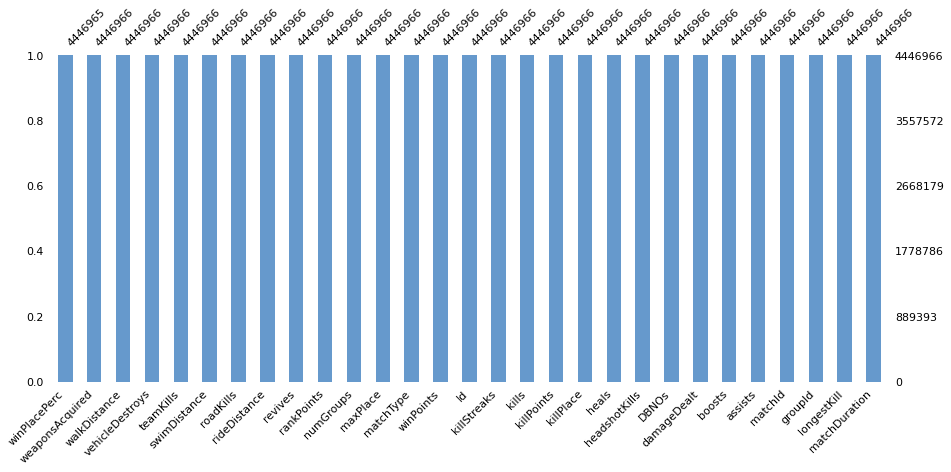

In [ ]:
# train 결측치 확인2
msno.bar(train, sort = "ascending", figsize = (15, 6), fontsize = 11, color = (0.4, 0.6, 0.8))
plt.show()

In [ ]:
# train 상세 수 확인1
train.describe().drop("count").T

,mean,std,min,25%,50%,75%,max
assists,0.233815,0.588573,0.0,0.000000,0.000000,0.000000,22.0
boosts,1.106908,1.715794,0.0,0.000000,0.000000,2.000000,33.0
damageDealt,130.717194,170.780624,0.0,0.000000,84.239998,186.000000,6616.0
DBNOs,0.657876,1.145743,0.0,0.000000,0.000000,1.000000,53.0
headshotKills,0.226820,0.602155,0.0,0.000000,0.000000,0.000000,64.0
heals,1.370147,2.679982,0.0,0.000000,0.000000,2.000000,80.0
killPlace,47.599350,27.462937,1.0,24.000000,47.000000,71.000000,101.0
killPoints,505.006042,627.504896,0.0,0.000000,0.000000,1172.000000,2170.0
kills,0.924783,1.558445,0.0,0.000000,0.000000,1.000000,72.0
killStreaks,0.543955,0.710972,0.0,0.000000,0.000000,1.000000,20.0


In [ ]:
# train 상세 수 확인2
train.describe(include = "O").T

,count,unique,top,freq
Id,4446966,4446966,7f96b2f878858a,1
groupId,4446966,2026745,14d6b54cdec6bc,74
matchId,4446966,47965,4b5db40aec4797,100
matchType,4446966,16,squad-fpp,1756186


In [ ]:
# test 데이터 확인
test.tail().T

,1934169,1934170,1934171,1934172,1934173
Id,a316c3a13887d5,5312146b27d875,fc8818b5b32ad3,a0f91e35f8458f,3696fc9f3a42b2
groupId,80e82180c90951,147264a127c56e,7bbb4779ebedd5,149a506a64c2b1,c770d7feaf020f
matchId,f276da5fd73536,fb77cbfe094a6b,efb74d5f6e9779,3a2cf335bc302f,9d4e2b6d506fd0
assists,1,0,0,1,0
boosts,2,0,0,2,0
damageDealt,381.0,0.0,91.959999,138.600006,19.799999
DBNOs,3,0,0,0,0
headshotKills,0,0,0,0,0
heals,7,0,3,12,0
killPlace,4,64,24,25,86


In [ ]:
# test 결측치 확인1
test.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

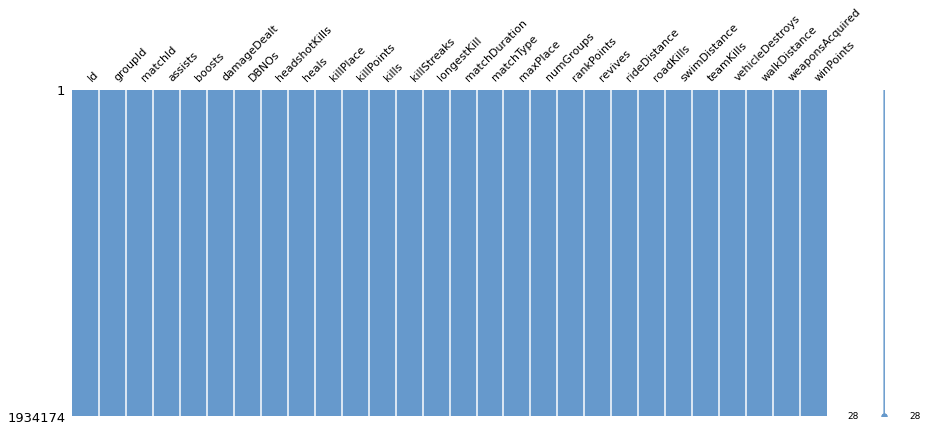

In [ ]:
# test 결측치 확인2
msno.matrix(test, sort = "ascending", figsize = (15, 6), fontsize = 11, color = (0.4, 0.6, 0.8))
plt.show()

# **2. Data analysis**

## 2-1) Target

- This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match.
- 예측 타겟 / 1은 1위, 0은 마지막 순위를 의미하는 백분율 기반의 승리 순위

> - winPlacePerc의 왜도는 0.1, 첨도는 -1.25입니다.
> - winPlacePerc가 0인 경우는 220505/4.96%입니다.
> - winPlacePerc 상위 10%(0.92)의 경우는 총 419329/9.43%입니다.

In [ ]:
# winPlacePerc 왜도 / 첨도 확인
print("Skewness : ", np.round(train["winPlacePerc"].skew(), 2))
print("Kurtosis : ", np.round(train["winPlacePerc"].kurt(), 2))

Skewness :  0.1
Kurtosis :  -1.25


In [ ]:
# winPlacePerc 여부에 따른 수와 비율 확인
winPlacePerc_0 = train["winPlacePerc"][train["winPlacePerc"] == 0].count()
winPlacePerc_rate_0 = np.round(winPlacePerc_0 / train_size * 100, 2)

# winPlacePerc 여부에 따른 수와 비율 확인(0 제외)
winPlacePerc_1 = train["winPlacePerc"][train["winPlacePerc"] != 0].count()
winPlacePerc_rate_1 = np.round(winPlacePerc_1 / train_size * 100, 2)

# winPlacePerc 상위 10% 확인(0 제외)
cond_1 = train["winPlacePerc"][train["winPlacePerc"] != 0].quantile(0.9)
cond_2 = train["winPlacePerc"].max()
winPlacePerc_top = pd.cut(train["winPlacePerc"],
                          bins = [0, cond_1, cond_2], include_lowest = True).value_counts().values[-1]
winPlacePerc_top_rate = np.round(winPlacePerc_top / train_size * 100, 2)

print("winPlacePerc_0 :", winPlacePerc_0, "\nwinPlacePerc_rate_0 :", winPlacePerc_rate_0, "\n--------------")
print("winPlacePerc_1 :", winPlacePerc_1, "\nwinPlacePerc_rate_1 :", winPlacePerc_rate_1, "\n--------------")
print("winPlacePerc_top :", winPlacePerc_top, "\nwinPlacePerc_top_rate :", winPlacePerc_top_rate, "\n--------------")

winPlacePerc_0 : 220505 
winPlacePerc_rate_0 : 4.96 
--------------
winPlacePerc_1 : 4226460 
winPlacePerc_rate_1 : 95.04 
--------------
winPlacePerc_top : 419329 
winPlacePerc_top_rate : 9.43 
--------------


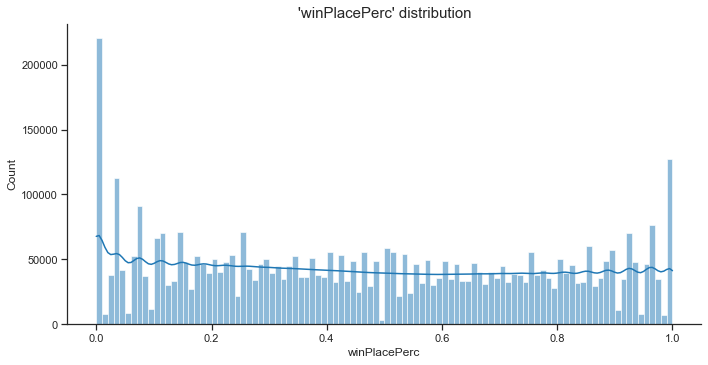

In [ ]:
# winPlacePerc 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "winPlacePerc", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'winPlacePerc' distribution", fontsize = 15)
plt.show()

## 2-2) Categorical columns

In [ ]:
# categorical 컬럼 분류
categorical_columns = train.dtypes[train.dtypes == "object"].index
categorical_columns_list = train[categorical_columns]
categorical_columns_list.head()

,Id,groupId,matchId,matchType
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,squad-fpp
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,squad-fpp
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,duo
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,squad-fpp
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,solo-fpp


### (1~3) Id / groupId / matchId

- Player’s ID / ID to identify a group within a match. / ID to identify match.  
- 플레이어 ID / 매치 내 그룹을 식별하는 ID / 매치를 식별하는 ID

> - Id : 플레이어에 할당된 고유값으로 공통적인 특성을 찾기 어렵습니다.
> - groupId : 플레이어가 다른 매치에 참가할 경우 매번 갱신된 값을 부여받기 때문에 일관적인 값이 아닙니다.  
> - matchId : 단순히 매치를 식별하기 위한 값으로 특성을 파악하기 위한 유의미한 정보가 아닙니다. 

In [ ]:
# Id / groupId / matchId 구분별 수 확인
for i in train[categorical_columns].drop("matchType", axis = 1):
    print(f"{i} :", train[i].nunique())

Id : 4446966
groupId : 2026745
matchId : 47965


In [ ]:
# groupId / matchId 문자 및 숫자 분리 > 중복을 피하기 위한 단순 나열 확인
for i in ["matchId", "groupId"]:
    s = train[i].str.replace(pat = "[^A-Za-z]", repl = "", regex = True)
    n = train[i].str.replace(pat = "[^0-9]", repl = "", regex = True)
    print(train[i].head(3))
    print(s.head(3))
    print(n.head(3), "\n--------------")

0    a10357fd1a4a91
1    aeb375fc57110c
2    110163d8bb94ae
Name: matchId, dtype: object
0     afdaa
1    aebfcc
2     dbbae
Name: matchId, dtype: object
0    103571491
1     37557110
2    110163894
Name: matchId, dtype: object 
--------------
0    4d4b580de459be
1    684d5656442f9e
2    6a4a42c3245a74
Name: groupId, dtype: object
0    dbdebe
1       dfe
2      aaca
Name: groupId, dtype: object
0       44580459
1    68456564429
2     6442324574
Name: groupId, dtype: object 
--------------


### (4) matchType

- String identifying the game mode that the data comes from 
- 스탠다드 모드의 매치 타입(“solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”)


- FPP(First Person Perspective) : 1인칭 모드  
- TPP(Third Person Perspective) : 3인칭 모드  
- Flare~ : 플레어건을 이용해 보급품을 얻는 이벤트 모드   
- Crash~ : 게임 도중 크래쉬 오류가 발생된 경우  

> - matchType은 크게 solo / duo / squad / flare / crash 총 5가지 경우로 구분됩니다.
> - squad(4인 플레이 방식)타입을 가장 선호하며, flare / crash의 특이 값들이 일부 존재합니다.

In [ ]:
# 상세 수 확인(전체)
train["matchType"].value_counts().sort_index()

crashfpp               6287
crashtpp                371
duo                  313591
duo-fpp              996691
flarefpp                718
flaretpp               2505
normal-duo              199
normal-duo-fpp         5489
normal-solo             326
normal-solo-fpp        1682
normal-squad            516
normal-squad-fpp      17174
solo                 181943
solo-fpp             536762
squad                626526
squad-fpp           1756186
Name: matchType, dtype: int64

In [ ]:
# matchType 종류별 항목 분리
matchType_list = ["solo", "duo", "squad", "flare", "crash"]
matchType_count = []
for i in matchType_list:
    k = train["matchType"].loc[train["matchType"].str.contains(i)].value_counts()
    matchType_count.append(k.sum())
    print(k)
    print(sum(k), "\n--------------")

solo-fpp           536762
solo               181943
normal-solo-fpp      1682
normal-solo           326
Name: matchType, dtype: int64
720713 
--------------
duo-fpp           996691
duo               313591
normal-duo-fpp      5489
normal-duo           199
Name: matchType, dtype: int64
1315970 
--------------
squad-fpp           1756186
squad                626526
normal-squad-fpp      17174
normal-squad            516
Name: matchType, dtype: int64
2400402 
--------------
flaretpp    2505
flarefpp     718
Name: matchType, dtype: int64
3223 
--------------
crashfpp    6287
crashtpp     371
Name: matchType, dtype: int64
6658 
--------------


## 2-3) Numerical columns

In [ ]:
# numerical 컬럼 분류
numerical_columns = train[train.columns.difference(categorical_columns)].columns
numerical_columns_list = train[numerical_columns]
numerical_columns_list.head()

,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,killStreaks,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,winPoints
0,0,0,0,0.000000,0,0,60,1241,0,0,...,0,0.0000,0,0.00,0,0,244.800003,1,0.4444,1466
1,0,0,0,91.470001,0,0,57,0,0,0,...,0,0.0045,0,11.04,0,0,1434.000000,5,0.6400,0
2,0,1,0,68.000000,0,0,47,0,0,0,...,0,0.0000,0,0.00,0,0,161.800003,2,0.7755,0
3,0,0,0,32.900002,0,0,75,0,0,0,...,0,0.0000,0,0.00,0,0,202.699997,3,0.1667,0
4,0,0,0,100.000000,0,0,45,0,1,1,...,0,0.0000,0,0.00,0,0,49.750000,2,0.1875,0


### (5) assists

- Number of enemy players this player damaged that were killed by teammates.
- 팀원과 적을 킬할 때, 플레이어가 기여한 정도

> - assists의 최소/최대는 1.0(0 제외)/22.0입니다.
> - assists가 0인 경우의 평균은 0.23이고, 총 3667660/82.48%입니다.
> - assists가 1인 경우의 평균은 1.33이고, 총 779306/17.52%입니다.
> - assists 상위 10%의 경우는 총 50279/1.13%입니다.

In [ ]:
# 상세 수 확인1(전체)
assists_describe_0 = np.round(train["assists"].describe().drop("count"), 2)
print(assists_describe_0, "\n--------------")

# 상세 수 확인2(0 제외)
assists_describe_1 = np.round(train["assists"][train["assists"] != 0].describe().drop("count"), 2)
print(assists_describe_1)

mean     0.23
std      0.59
min      0.00
25%      0.00
50%      0.00
75%      0.00
max     22.00
Name: assists, dtype: float64 
--------------
mean     1.33
std      0.71
min      1.00
25%      1.00
50%      1.00
75%      1.00
max     22.00
Name: assists, dtype: float64


In [ ]:
# 상세 수 확인3(전체)
train["assists"].value_counts().sort_index()

0     3667660
1      591883
2      137144
3       35640
4        9990
5        2892
6         976
7         387
8         185
9          84
10         48
11         27
12         20
13         16
14          2
15          7
17          2
20          1
21          1
22          1
Name: assists, dtype: int64

In [ ]:
# assists 여부에 따른 수와 비율 확인
assists_0 = train["assists"][train["assists"] == 0].count()
assists_rate_0 = np.round(assists_0 / train_size * 100, 2)

# assists 여부에 따른 수와 비율 확인(0 제외)
assists_1 = train["assists"][train["assists"] != 0].count()
assists_rate_1 = np.round(assists_1 / train_size * 100, 2)

# assists 상위 10% 확인(0 제외)
cond_1 = train["assists"][train["assists"] != 0].quantile(0.9)
cond_2 = train["assists"].max()
assists_top = pd.cut(train["assists"], bins = [0, cond_1, cond_2], include_lowest = True).value_counts().values[-1]
assists_top_rate = np.round(assists_top / train_size * 100, 2)

print("assists_0 :", assists_0, "\nassists_rate_0 :", assists_rate_0, "\n--------------")
print("assists_1 :", assists_1, "\nassists_rate_1 :", assists_rate_1, "\n--------------")
print("assists_top :", assists_top, "\nassists_top_rate :", assists_top_rate, "\n--------------")

assists_0 : 3667660 
assists_rate_0 : 82.48 
--------------
assists_1 : 779306 
assists_rate_1 : 17.52 
--------------
assists_top : 50279 
assists_top_rate : 1.13 
--------------


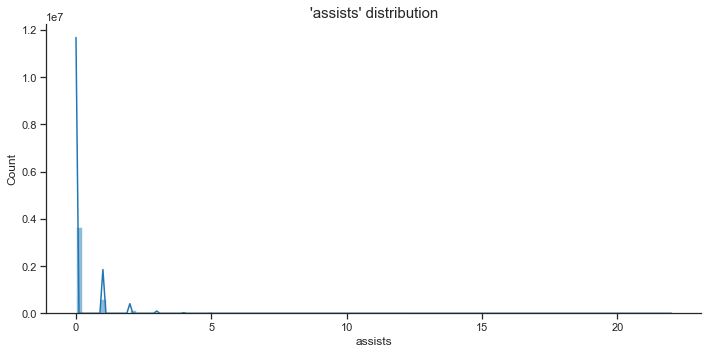

In [ ]:
# assists 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "assists", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'assists' distribution", fontsize = 15)
plt.show()

In [ ]:
# assists 결과 출력
column = "assists"
result_0 = f"> - {column}의 최소/최대는 {assists_describe_1['min']}(0 제외)/{assists_describe_1['max']}입니다."
result_1 = f"> - {column}가 0인 경우의 평균은 {assists_describe_0[0]}이고, 총 {assists_0}/{assists_rate_0}%입니다."
result_2 = f"> - {column}가 1인 경우의 평균은 {assists_describe_1[0]}이고, 총 {assists_1}/{assists_rate_1}%입니다."
result_3 = f"> - {column} 상위 10%의 경우는 총 {assists_top}/{assists_top_rate}%입니다."
print(result_0, result_1, result_2, result_3, sep = "\n")

> - assists의 최소/최대는 1.0(0 제외)/22.0입니다.
> - assists가 0인 경우의 평균은 0.23이고, 총 3667660/82.48%입니다.
> - assists가 1인 경우의 평균은 1.33이고, 총 779306/17.52%입니다.
> - assists 상위 10%의 경우는 총 50279/1.13%입니다.


### (6) boosts

- Number of boost items used.  
- 부스트 아이템을 사용한 수 / 부스트 게이지를 회복한 수  

> - boosts의 최소/최대는 1.0(0 제외)/33.0입니다.
> - boosts가 0인 경우의 평균은 1.11이고, 총 2521324/56.7%입니다.
> - boosts가 1인 경우의 평균은 2.56이고, 총 1925642/43.3%입니다.
> - boosts 상위 10%의 경우는 총 142191/3.2%입니다.

In [ ]:
# 상세 수 확인1(전체)
boosts_describe_0 = np.round(train["boosts"].describe().drop("count"), 2)
print(boosts_describe_0, "\n--------------")

# 상세 수 확인2(0 제외)
boosts_describe_1 = np.round(train["boosts"][train["boosts"] != 0].describe().drop("count"), 2)
print(boosts_describe_1)

mean     1.11
std      1.72
min      0.00
25%      0.00
50%      0.00
75%      2.00
max     33.00
Name: boosts, dtype: float64 
--------------
mean     2.56
std      1.76
min      1.00
25%      1.00
50%      2.00
75%      3.00
max     33.00
Name: boosts, dtype: float64


In [ ]:
# 상세 수 확인3(전체)
train["boosts"].value_counts().sort_index()

0     2521324
1      680252
2      491316
3      295883
4      195729
5      120271
6       70111
7       37626
8       18893
9        8638
10       3992
11       1644
12        726
13        295
14        126
15         62
16         30
17         16
18         13
19          6
20          3
21          4
22          1
23          1
24          2
28          1
33          1
Name: boosts, dtype: int64

In [ ]:
# boosts 여부에 따른 수와 비율 확인
boosts_0 = train["boosts"][train["boosts"] == 0].count()
boosts_rate_0 = np.round(boosts_0 / train_size * 100, 2)

# boosts 여부에 따른 수와 비율 확인(0 제외)
boosts_1 = train["boosts"][train["boosts"] != 0].count()
boosts_rate_1 = np.round(boosts_1 / train_size * 100, 2)

# boosts 상위 10% 확인(0 제외)
cond_1 = train["boosts"][train["boosts"] != 0].quantile(0.9)
cond_2 = train["boosts"].max()
boosts_top = pd.cut(train["boosts"], bins = [0, cond_1, cond_2], include_lowest = True).value_counts().values[-1]
boosts_top_rate = np.round(boosts_top / train_size * 100, 2)

print("boosts_0 :", boosts_0, "\nboosts_rate_0 :", boosts_rate_0, "\n--------------")
print("boosts_1 :", boosts_1, "\nboosts_rate_1 :", boosts_rate_1, "\n--------------")
print("boosts_top :", boosts_top, "\nboosts_top_rate :", boosts_top_rate, "\n--------------")

boosts_0 : 2521324 
boosts_rate_0 : 56.7 
--------------
boosts_1 : 1925642 
boosts_rate_1 : 43.3 
--------------
boosts_top : 142191 
boosts_top_rate : 3.2 
--------------


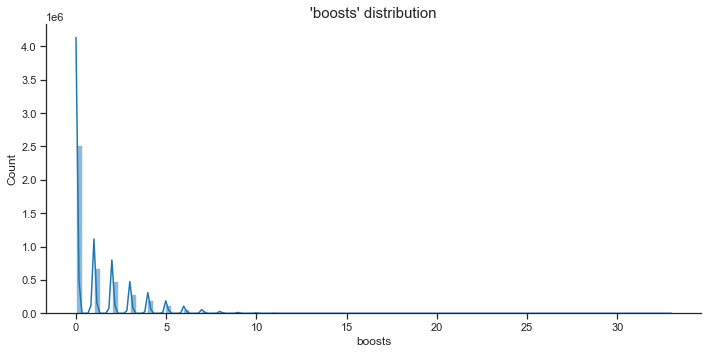

In [ ]:
# boosts 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "boosts", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'boosts' distribution", fontsize = 15)
plt.show()

In [ ]:
# boosts 결과 출력
column = "boosts"
result_0 = f"> - {column}의 최소/최대는 {boosts_describe_1['min']}(0 제외)/{boosts_describe_1['max']}입니다."
result_1 = f"> - {column}가 0인 경우의 평균은 {boosts_describe_0[0]}이고, 총 {boosts_0}/{boosts_rate_0}%입니다."
result_2 = f"> - {column}가 1인 경우의 평균은 {boosts_describe_1[0]}이고, 총 {boosts_1}/{boosts_rate_1}%입니다."
result_3 = f"> - {column} 상위 10%의 경우는 총 {boosts_top}/{boosts_top_rate}%입니다."
print(result_0, result_1, result_2, result_3, sep = "\n")

> - boosts의 최소/최대는 1.0(0 제외)/33.0입니다.
> - boosts가 0인 경우의 평균은 1.11이고, 총 2521324/56.7%입니다.
> - boosts가 1인 경우의 평균은 2.56이고, 총 1925642/43.3%입니다.
> - boosts 상위 10%의 경우는 총 142191/3.2%입니다.


### (7) damageDealt

- Total damage dealt. Note: Self inflicted damage is subtracted.  
- 적에게 가한 총 데미지

> - damageDealt의 최소/최대는 0.0002(0 제외)/6616.0입니다.
> - damageDealt가 0인 경우의 평균은 130.7172이고, 총 1238102/27.84%입니다.
> - damageDealt가 1인 경우의 평균은 181.1528이고, 총 3208864/72.16%입니다.
> - damageDealt 상위 10%의 경우는 총 320745/7.21%입니다.

In [ ]:
# 상세 수 확인1(전체)
damageDealt_describe_0 = np.round(train["damageDealt"].describe().drop("count"), 4)
print(damageDealt_describe_0, "\n--------------")

# 상세 수 확인2(0 제외)
damageDealt_describe_1 = np.round(train["damageDealt"][train["damageDealt"] != 0].describe().drop("count"), 4)
print(damageDealt_describe_1)

mean     130.7172
std      170.7806
min        0.0000
25%        0.0000
50%       84.2400
75%      186.0000
max     6616.0000
Name: damageDealt, dtype: float64 
--------------
mean     181.1528
std      176.8695
min        0.0002
25%       70.3100
50%      123.6000
75%      233.7000
max     6616.0000
Name: damageDealt, dtype: float64


In [ ]:
# 상세 수 확인3(전체)
train["damageDealt"].value_counts().sort_index()

0.0000       1238102
0.0002             1
0.0008             2
0.0009             2
0.0013             1
              ...   
5557.0000          1
5793.0000          1
5990.0000          1
6375.0000          1
6616.0000          1
Name: damageDealt, Length: 29916, dtype: int64

In [ ]:
# damageDealt 여부에 따른 수와 비율 확인
damageDealt_0 = train["damageDealt"][train["damageDealt"] == 0].count()
damageDealt_rate_0 = np.round(damageDealt_0 / train_size * 100, 2)

# damageDealt 여부에 따른 수와 비율 확인(0 제외)
damageDealt_1 = train["damageDealt"][train["damageDealt"] != 0].count()
damageDealt_rate_1 = np.round(damageDealt_1 / train_size * 100, 2)

# damageDealt 상위 10% 확인(0 제외)
cond_1 = train["damageDealt"][train["damageDealt"] != 0].quantile(0.9)
cond_2 = train["damageDealt"].max()
damageDealt_top = pd.cut(train["damageDealt"], bins = [0, cond_1, cond_2], include_lowest = True).value_counts().values[-1]
damageDealt_top_rate = np.round(damageDealt_top / train_size * 100, 2)

print("damageDealt_0 :", damageDealt_0, "\ndamageDealt_rate_0 :", damageDealt_rate_0, "\n--------------")
print("damageDealt_1 :", damageDealt_1, "\ndamageDealt_rate_1 :", damageDealt_rate_1, "\n--------------")
print("damageDealt_top :", damageDealt_top, "\ndamageDealt_top_rate :", damageDealt_top_rate, "\n--------------")

damageDealt_0 : 1238102 
damageDealt_rate_0 : 27.84 
--------------
damageDealt_1 : 3208864 
damageDealt_rate_1 : 72.16 
--------------
damageDealt_top : 320745 
damageDealt_top_rate : 7.21 
--------------


In [ ]:
train.loc[train["damageDealt"] == 0, "winPlacePerc"].mean()

0.3169037

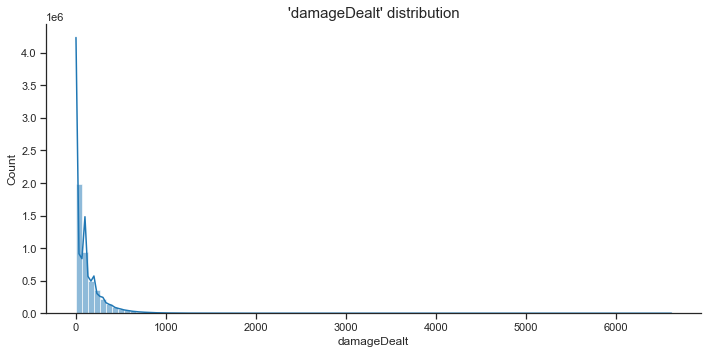

In [ ]:
# damageDealt 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "damageDealt", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'damageDealt' distribution", fontsize = 15)
plt.show()

In [ ]:
# damageDealt 결과 출력
column = "damageDealt"
result_0 = f"> - {column}의 최소/최대는 {damageDealt_describe_1['min']}(0 제외)/{damageDealt_describe_1['max']}입니다."
result_1 = f"> - {column}가 0인 경우의 평균은 {damageDealt_describe_0[0]}이고, 총 {damageDealt_0}/{damageDealt_rate_0}%입니다."
result_2 = f"> - {column}가 1인 경우의 평균은 {damageDealt_describe_1[0]}이고, 총 {damageDealt_1}/{damageDealt_rate_1}%입니다."
result_3 = f"> - {column} 상위 10%의 경우는 총 {damageDealt_top}/{damageDealt_top_rate}%입니다."
print(result_0, result_1, result_2, result_3, sep = "\n")

> - damageDealt의 최소/최대는 0.0002(0 제외)/6616.0입니다.
> - damageDealt가 0인 경우의 평균은 130.7172이고, 총 1238102/27.84%입니다.
> - damageDealt가 1인 경우의 평균은 181.1528이고, 총 3208864/72.16%입니다.
> - damageDealt 상위 10%의 경우는 총 320745/7.21%입니다.


### (8) DBNOs

- Number of enemy players knocked. 
- Down But Not Out, 적을 공격해 기절 상태로 만들었지만 적의 팀원이 부활시켜 킬되지 않은 수
- matchType이 solo인 경우, 소생시켜줄 수 있는 팀원이 없으므로 값은 항상 0입니다.

> - DBNOs의 최소/최대는 1.0(0 제외)/53.0입니다.
> - DBNOs가 0인 경우의 평균은 0.66이고, 총 2773735/62.37%입니다.
> - DBNOs가 1인 경우의 평균은 1.75이고, 총 1673231/37.63%입니다.
> - DBNOs 상위 10%의 경우는 총 132149/2.97%입니다.

In [ ]:
# 상세 수 확인1(전체)
DBNOs_describe_0 = np.round(train["DBNOs"].describe().drop("count"), 2)
print(DBNOs_describe_0, "\n--------------")

# 상세 수 확인2(0 제외)
DBNOs_describe_1 = np.round(train["DBNOs"][train["DBNOs"] != 0].describe().drop("count"), 2)
print(DBNOs_describe_1)

mean     0.66
std      1.15
min      0.00
25%      0.00
50%      0.00
75%      1.00
max     53.00
Name: DBNOs, dtype: float64 
--------------
mean     1.75
std      1.26
min      1.00
25%      1.00
50%      1.00
75%      2.00
max     53.00
Name: DBNOs, dtype: float64


In [ ]:
# 상세 수 확인3(전체)
train["DBNOs"].value_counts().sort_index()

0     2773735
1      983281
2      395119
3      162682
4       69307
5       31686
6       14977
7        7291
8        3694
9        1966
10       1110
11        643
12        466
13        275
14        177
15        137
16         87
17         80
18         64
19         34
20         30
21         26
22         18
23         14
24         10
25         16
26         11
27          6
28          3
29          1
30          1
31          3
32          3
33          7
35          1
38          1
39          2
40          1
53          1
Name: DBNOs, dtype: int64

In [ ]:
# DBNOs 여부에 따른 수와 비율 확인
DBNOs_0 = train["DBNOs"][train["DBNOs"] == 0].count()
DBNOs_rate_0 = np.round(DBNOs_0 / train_size * 100, 2)

# DBNOs 여부에 따른 수와 비율 확인
DBNOs_1 = train["DBNOs"][train["DBNOs"] != 0].count()
DBNOs_rate_1 = np.round(DBNOs_1 / train_size * 100, 2)

# DBNOs 상위 10% 확인(0 제외)
cond_1 = train["DBNOs"][train["DBNOs"] != 0].quantile(0.9)
cond_2 = train["DBNOs"].max()
DBNOs_top = pd.cut(train["DBNOs"], bins = [0, cond_1, cond_2], include_lowest = True).value_counts().values[-1]
DBNOs_top_rate = np.round(DBNOs_top / train_size * 100, 2)

print("DBNOs_0 :", DBNOs_0, "\nDBNOs_rate_0 :", DBNOs_rate_0, "\n--------------")
print("DBNOs_1 :", DBNOs_1, "\nDBNOs_rate_1 :", DBNOs_rate_1, "\n--------------")
print("DBNOs_top :", DBNOs_top, "\nDBNOs_top_rate :", DBNOs_top_rate, "\n--------------")

DBNOs_0 : 2773735 
DBNOs_rate_0 : 62.37 
--------------
DBNOs_1 : 1673231 
DBNOs_rate_1 : 37.63 
--------------
DBNOs_top : 132149 
DBNOs_top_rate : 2.97 
--------------


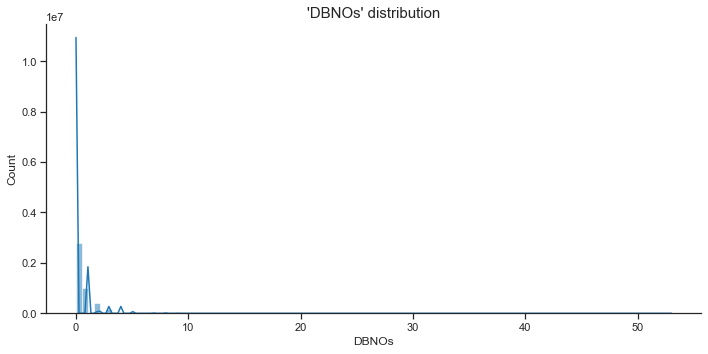

In [ ]:
# DBNOs 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "DBNOs", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'DBNOs' distribution", fontsize = 15)
plt.show()

In [ ]:
# DBNOs 결과 출력
column = "DBNOs"
result_0 = f"> - {column}의 최소/최대는 {DBNOs_describe_1['min']}(0 제외)/{DBNOs_describe_1['max']}입니다."
result_1 = f"> - {column}가 0인 경우의 평균은 {DBNOs_describe_0[0]}이고, 총 {DBNOs_0}/{DBNOs_rate_0}%입니다."
result_2 = f"> - {column}가 1인 경우의 평균은 {DBNOs_describe_1[0]}이고, 총 {DBNOs_1}/{DBNOs_rate_1}%입니다."
result_3 = f"> - {column} 상위 10%의 경우는 총 {DBNOs_top}/{DBNOs_top_rate}%입니다."
print(result_0, result_1, result_2, result_3, sep = "\n")

> - DBNOs의 최소/최대는 1.0(0 제외)/53.0입니다.
> - DBNOs가 0인 경우의 평균은 0.66이고, 총 2773735/62.37%입니다.
> - DBNOs가 1인 경우의 평균은 1.75이고, 총 1673231/37.63%입니다.
> - DBNOs 상위 10%의 경우는 총 132149/2.97%입니다.


### (9) headshotKills

- Number of enemy players killed with headshots.
- 헤드샷으로 물리친 적의 수

> - headshotKills의 최소/최대는 1.0(0 제외)/64.0입니다.
> - headshotKills가 0인 경우의 평균은 0.23이고, 총 3696116/83.12%입니다.
> - headshotKills가 1인 경우의 평균은 1.34이고, 총 750850/16.88%입니다.
> - headshotKills 상위 10%의 경우는 총 49761/1.12%입니다.

In [ ]:
# 상세 수 확인1(전체)
headshotKills_describe_0 = np.round(train["headshotKills"].describe().drop("count"), 2)
print(headshotKills_describe_0, "\n--------------")

# 상세 수 확인2(0 제외)
headshotKills_describe_1 = np.round(train["headshotKills"][train["headshotKills"] != 0].describe().drop("count"), 2)
print(headshotKills_describe_1)

mean     0.23
std      0.60
min      0.00
25%      0.00
50%      0.00
75%      0.00
max     64.00
Name: headshotKills, dtype: float64 
--------------
mean     1.34
std      0.80
min      1.00
25%      1.00
50%      1.00
75%      1.00
max     64.00
Name: headshotKills, dtype: float64


In [ ]:
# 상세 수 확인3(전체)
train["headshotKills"].value_counts().sort_index()

0     3696116
1      574741
2      126348
3       32975
4        9962
5        3616
6        1439
7         757
8         373
9         215
10        136
11         79
12         64
13         44
14         23
15         16
16         15
17         11
18          9
19          3
20          3
21          2
23          3
26          3
27          2
31          2
34          2
35          1
39          1
40          1
41          1
42          1
46          1
64          1
Name: headshotKills, dtype: int64

In [ ]:
# headshotKills 여부에 따른 수와 비율 확인
headshotKills_0 = train["headshotKills"][train["headshotKills"] == 0].count()
headshotKills_rate_0 = np.round(headshotKills_0 / train_size * 100, 2)

# headshotKills 여부에 따른 수와 비율 확인(0 제외)
headshotKills_1 = train["headshotKills"][train["headshotKills"] != 0].count()
headshotKills_rate_1 = np.round(headshotKills_1 / train_size * 100, 2)

# headshotKills 상위 10% 확인(0 제외)
cond_1 = train["headshotKills"][train["headshotKills"] != 0].quantile(0.9)
cond_2 = train["headshotKills"].max()
headshotKills_top = pd.cut(train["headshotKills"], bins = [0, cond_1, cond_2], include_lowest = True).value_counts().values[-1]
headshotKills_top_rate = np.round(headshotKills_top / train_size * 100, 2)

print("headshotKills_0 :", headshotKills_0, "\nheadshotKills_rate_0 :", headshotKills_rate_0, "\n--------------")
print("headshotKills_1 :", headshotKills_1, "\nheadshotKills_rate_1 :", headshotKills_rate_1, "\n--------------")
print("headshotKills_top :", headshotKills_top, "\nheadshotKills_top_rate :", headshotKills_top_rate, "\n--------------")

headshotKills_0 : 3696116 
headshotKills_rate_0 : 83.12 
--------------
headshotKills_1 : 750850 
headshotKills_rate_1 : 16.88 
--------------
headshotKills_top : 49761 
headshotKills_top_rate : 1.12 
--------------


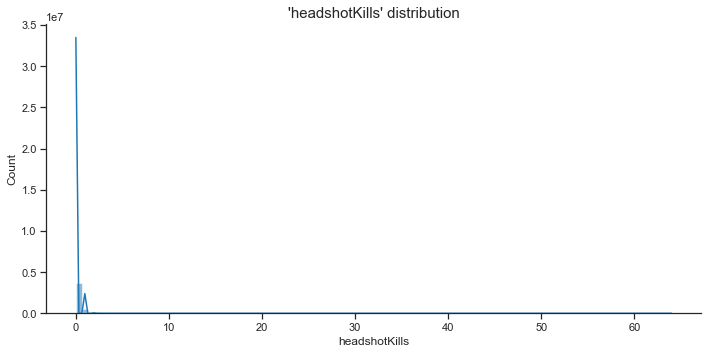

In [ ]:
# headshotKills 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "headshotKills", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'headshotKills' distribution", fontsize = 15)
plt.show()

In [ ]:
# headshotKills 결과 출력
column = "headshotKills"
result_0 = f"> - {column}의 최소/최대는 {headshotKills_describe_1['min']}(0 제외)/{headshotKills_describe_1['max']}입니다."
result_1 = f"> - {column}가 0인 경우의 평균은 {headshotKills_describe_0[0]}이고, 총 {headshotKills_0}/{headshotKills_rate_0}%입니다."
result_2 = f"> - {column}가 1인 경우의 평균은 {headshotKills_describe_1[0]}이고, 총 {headshotKills_1}/{headshotKills_rate_1}%입니다."
result_3 = f"> - {column} 상위 10%의 경우는 총 {headshotKills_top}/{headshotKills_top_rate}%입니다."
print(result_0, result_1, result_2, result_3, sep = "\n")

> - headshotKills의 최소/최대는 1.0(0 제외)/64.0입니다.
> - headshotKills가 0인 경우의 평균은 0.23이고, 총 3696116/83.12%입니다.
> - headshotKills가 1인 경우의 평균은 1.34이고, 총 750850/16.88%입니다.
> - headshotKills 상위 10%의 경우는 총 49761/1.12%입니다.


### (10) heals

- Number of healing items used.
- 회복 아이템 사용 수

> - heals의 최소/최대는 1.0(0 제외)/80.0입니다.
> - heals가 0인 경우의 평균은 1.37이고, 총 2648198/59.55%입니다.
> - heals가 1인 경우의 평균은 3.39이고, 총 1798768/40.45%입니다.
> - heals 상위 10%의 경우는 총 173879/3.91%입니다.

In [ ]:
# 상세 수 확인1(전체)
heals_describe_0 = np.round(train["heals"].describe().drop("count"), 2)
print(heals_describe_0, "\n--------------")

# 상세 수 확인2(0 제외)
heals_describe_1 = np.round(train["heals"][train["heals"] != 0].describe().drop("count"), 2)
print(heals_describe_1)

mean     1.37
std      2.68
min      0.00
25%      0.00
50%      0.00
75%      2.00
max     80.00
Name: heals, dtype: float64 
--------------
mean     3.39
std      3.31
min      1.00
25%      1.00
50%      2.00
75%      5.00
max     80.00
Name: heals, dtype: float64


In [ ]:
# 상세 수 확인3(전체)
train["heals"].value_counts().sort_index()

0     2648198
1      673077
2      319387
3      202370
4      142637
       ...   
61          2
62          1
63          1
73          1
80          1
Name: heals, Length: 63, dtype: int64

In [ ]:
# heals 여부에 따른 수와 비율 확인
heals_0 = train["heals"][train["heals"] == 0].count()
heals_rate_0 = np.round(heals_0 / train_size * 100, 2)

# heals 여부에 따른 수와 비율 확인(0 제외)
heals_1 = train["heals"][train["heals"] != 0].count()
heals_rate_1 = np.round(heals_1 / train_size * 100, 2)

# heals 상위 10% 확인(0 제외)
cond_1 = train["heals"][train["heals"] != 0].quantile(0.9)
cond_2 = train["heals"].max()
heals_top = pd.cut(train["heals"], bins = [0, cond_1, cond_2], include_lowest = True).value_counts().values[-1]
heals_top_rate = np.round(heals_top / train_size * 100, 2)

print("heals_0 :", heals_0, "\nheals_rate_0 :", heals_rate_0, "\n--------------")
print("heals_1 :", heals_1, "\nheals_rate_1 :", heals_rate_1, "\n--------------")
print("heals_top :", heals_top, "\nheals_top_rate :", heals_top_rate, "\n--------------")

heals_0 : 2648198 
heals_rate_0 : 59.55 
--------------
heals_1 : 1798768 
heals_rate_1 : 40.45 
--------------
heals_top : 173879 
heals_top_rate : 3.91 
--------------


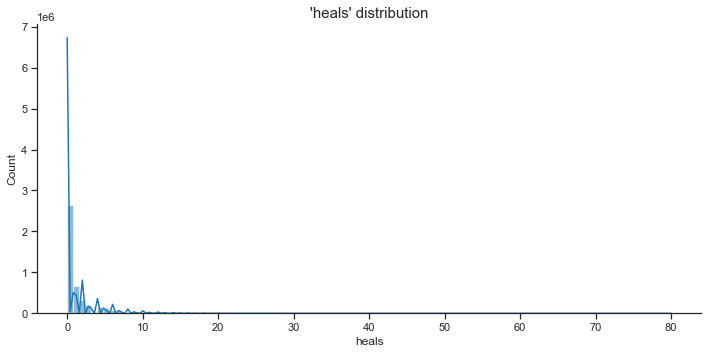

In [ ]:
# heals 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "heals", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'heals' distribution", fontsize = 15)
plt.show()

In [ ]:
# heals 결과 출력
column = "heals"
result_0 = f"> - {column}의 최소/최대는 {heals_describe_1['min']}(0 제외)/{heals_describe_1['max']}입니다."
result_1 = f"> - {column}가 0인 경우의 평균은 {heals_describe_0[0]}이고, 총 {heals_0}/{heals_rate_0}%입니다."
result_2 = f"> - {column}가 1인 경우의 평균은 {heals_describe_1[0]}이고, 총 {heals_1}/{heals_rate_1}%입니다."
result_3 = f"> - {column} 상위 10%의 경우는 총 {heals_top}/{heals_top_rate}%입니다."
print(result_0, result_1, result_2, result_3, sep = "\n")

> - heals의 최소/최대는 1.0(0 제외)/80.0입니다.
> - heals가 0인 경우의 평균은 1.37이고, 총 2648198/59.55%입니다.
> - heals가 1인 경우의 평균은 3.39이고, 총 1798768/40.45%입니다.
> - heals 상위 10%의 경우는 총 173879/3.91%입니다.


### (11) killPlace

- Ranking in match of number of enemy players killed.
- 경기에서 적을 킬한 수의 랭킹

> - killPlace의 평균은 47.6이고, 최소/최대는 1.0/101.0입니다.
> - killPlace의 경우의 수가 가장 적은 것은 101(1), 가장 큰 것은 1(47965)입니다.

In [ ]:
# 상세 수 확인1
killPlace_describe = np.round(train["killPlace"].describe().drop("count"), 2)
print(killPlace_describe)

mean     47.60
std      27.46
min       1.00
25%      24.00
50%      47.00
75%      71.00
max     101.00
Name: killPlace, dtype: float64


In [ ]:
# 상세 수 확인2
killPlace_vc = train["killPlace"].value_counts().sort_index()
killPlace_vc

1      47965
2      47964
3      47962
4      47962
5      47962
       ...  
97     16080
98     10005
99      4461
100     1415
101        1
Name: killPlace, Length: 101, dtype: int64

In [ ]:
# killPlace value_counts 최소/최대 확인
killPlace_vc_min = killPlace_vc[killPlace_vc.values == killPlace_vc.min()]
killPlace_vc_max = killPlace_vc[killPlace_vc.values == killPlace_vc.max()]
print(killPlace_vc_min, "\n--------------")
print(killPlace_vc_max)

101    1
Name: killPlace, dtype: int64 
--------------
1    47965
Name: killPlace, dtype: int64


In [ ]:
train[["groupId", "matchId", "killPlace", "winPlacePerc", "matchType"]][train["killPlace"] == 101]

,groupId,matchId,killPlace,winPlacePerc,matchType
3679420,05c7966baad337,fe57e25e37dbfd,101,0.0,normal-squad


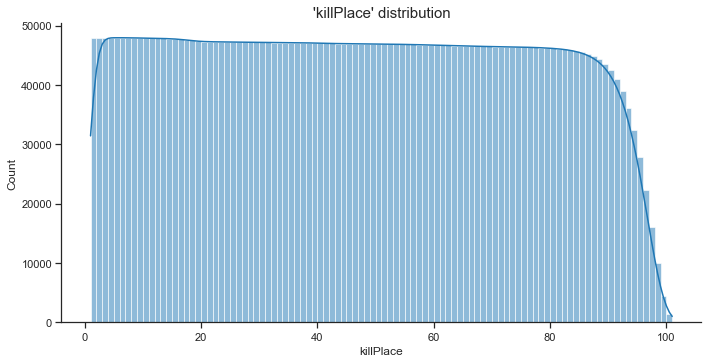

In [ ]:
# killPlace 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "killPlace", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'killPlace' distribution", fontsize = 15)
plt.show()

In [ ]:
# killPlace 결과 출력
column = "killPlace"
result_1 = f"> - {column}의 평균은 {killPlace_describe[0]}이고, 최소/최대는 {killPlace_describe['min']}/{killPlace_describe['max']}입니다."
result_2 = f"> - {column}의 경우의 수가 가장 적은 것은 {killPlace_vc_min.index[0]}({killPlace_vc_min.values[0]}), 가장 큰 것은 {killPlace_vc_max.index[0]}({killPlace_vc_max.values[0]})입니다."
print(result_1, result_2, sep = "\n")

> - killPlace의 평균은 47.6이고, 최소/최대는 1.0/101.0입니다.
> - killPlace의 경우의 수가 가장 적은 것은 101(1), 가장 큰 것은 1(47965)입니다.


### (12) killPoints

- Kills-based external ranking of player.
- 적을 킬한 수를 기반으로 산정한 Elo 방식의 랭킹

> - killPoints의 최소/최대는 134.0(0 제외)/2170.0입니다.
> - killPoints가 0인 경우의 평균은 505.01이고, 총 2655647/59.72%입니다.
> - killPoints가 1인 경우의 평균은 1253.68이고, 총 1791319/40.28%입니다.
> - killPoints 상위 10%의 경우는 총 177982/4.0%입니다.

In [ ]:
# 상세 수 확인1(전체)
killPoints_describe_0 = np.round(train["killPoints"].describe().drop("count"), 2)
print(killPoints_describe_0, "\n--------------")

# 상세 수 확인2(0 제외)
killPoints_describe_1 = np.round(train["killPoints"][train["killPoints"] != 0].describe().drop("count"), 2)
print(killPoints_describe_1)

mean     505.01
std      627.50
min        0.00
25%        0.00
50%        0.00
75%     1172.00
max     2170.00
Name: killPoints, dtype: float64 
--------------
mean    1253.68
std      197.27
min      134.00
25%     1090.00
50%     1240.00
75%     1386.00
max     2170.00
Name: killPoints, dtype: float64


In [ ]:
# 상세 수 확인3(전체)
train["killPoints"].value_counts().sort_index()

0       2655647
134           2
138           5
142           6
143           1
         ...   
2150          1
2152          2
2154          1
2156          1
2170          1
Name: killPoints, Length: 1707, dtype: int64

In [ ]:
# killPoints 여부에 따른 수와 비율 확인
killPoints_0 = train["killPoints"][train["killPoints"] == 0].count()
killPoints_rate_0 = np.round(killPoints_0 / train_size * 100, 2)

# killPoints 여부에 따른 수와 비율 확인(0 제외)
killPoints_1 = train["killPoints"][train["killPoints"] != 0].count()
killPoints_rate_1 = np.round(killPoints_1 / train_size * 100, 2)

# killPoints 상위 10% 확인(0 제외)
cond_1 = train["killPoints"][train["killPoints"] != 0].quantile(0.9)
cond_2 = train["killPoints"].max()
killPoints_top = pd.cut(train["killPoints"], bins = [0, cond_1, cond_2], include_lowest = True).value_counts().values[-1]
killPoints_top_rate = np.round(killPoints_top / train_size * 100, 2)

print("killPoints_0 :", killPoints_0, "\nkillPoints_rate_0 :", killPoints_rate_0, "\n--------------")
print("killPoints_1 :", killPoints_1, "\nkillPoints_rate_1 :", killPoints_rate_1, "\n--------------")
print("killPoints_top :", killPoints_top, "\nkillPoints_top_rate :", killPoints_top_rate, "\n--------------")

killPoints_0 : 2655647 
killPoints_rate_0 : 59.72 
--------------
killPoints_1 : 1791319 
killPoints_rate_1 : 40.28 
--------------
killPoints_top : 177982 
killPoints_top_rate : 4.0 
--------------


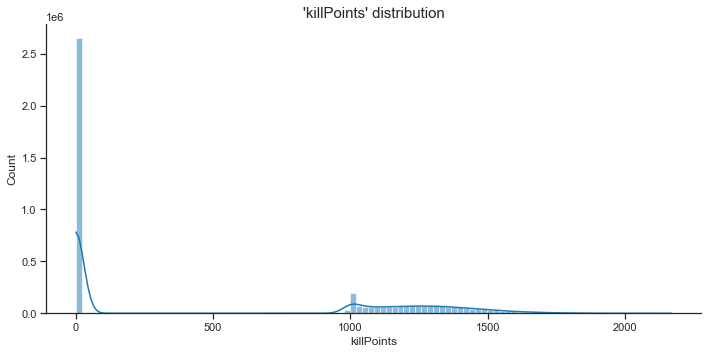

In [ ]:
# killPoints 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "killPoints", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'killPoints' distribution", fontsize = 15)
plt.show()

In [ ]:
# killPoints 결과 출력
column = "killPoints"
result_0 = f"> - {column}의 최소/최대는 {killPoints_describe_1['min']}(0 제외)/{killPoints_describe_1['max']}입니다."
result_1 = f"> - {column}가 0인 경우의 평균은 {killPoints_describe_0[0]}이고, 총 {killPoints_0}/{killPoints_rate_0}%입니다."
result_2 = f"> - {column}가 1인 경우의 평균은 {killPoints_describe_1[0]}이고, 총 {killPoints_1}/{killPoints_rate_1}%입니다."
result_3 = f"> - {column} 상위 10%의 경우는 총 {killPoints_top}/{killPoints_top_rate}%입니다."
print(result_0, result_1, result_2, result_3, sep = "\n")

> - killPoints의 최소/최대는 134.0(0 제외)/2170.0입니다.
> - killPoints가 0인 경우의 평균은 505.01이고, 총 2655647/59.72%입니다.
> - killPoints가 1인 경우의 평균은 1253.68이고, 총 1791319/40.28%입니다.
> - killPoints 상위 10%의 경우는 총 177982/4.0%입니다.


### (13) kills

- Number of enemy players killed.
- 킬한 적의 수

> - kills의 최소/최대는 1.0(0 제외)/72.0입니다.
> - kills가 0인 경우의 평균은 0.92이고, 총 2529722/56.89%입니다.
> - kills가 1인 경우의 평균은 2.14이고, 총 1917244/43.11%입니다.
> - kills 상위 10%의 경우는 총 159715/3.59%입니다.

In [ ]:
# 상세 수 확인1(전체)
kills_describe_0 = np.round(train["kills"].describe().drop("count"), 2)
print(kills_describe_0, "\n--------------")

# 상세 수 확인2(0 제외)
kills_describe_1 = np.round(train["kills"][train["kills"] != 0].describe().drop("count"), 2)
print(kills_describe_1)

mean     0.92
std      1.56
min      0.00
25%      0.00
50%      0.00
75%      1.00
max     72.00
Name: kills, dtype: float64 
--------------
mean     2.14
std      1.74
min      1.00
25%      1.00
50%      2.00
75%      3.00
max     72.00
Name: kills, dtype: float64


In [ ]:
# 상세 수 확인3(전체)
train["kills"].value_counts().sort_index()

0     2529722
1      928079
2      472466
3      232441
4      124543
5       66577
6       37960
7       21816
8       12779
9        7644
10       4599
11       2799
12       1755
13       1137
14        757
15        484
16        325
17        234
18        165
19        112
20        109
21         70
22         77
23         47
24         44
25         27
26         27
27         21
28         22
29         13
30         13
31         13
32          4
33         12
34          5
35          7
36          8
37          5
38          7
39          4
40          4
41          5
42          3
43          3
44          2
45          1
46          2
47          1
48          1
49          1
50          1
53          4
55          2
56          2
57          2
65          1
66          1
72          1
Name: kills, dtype: int64

In [ ]:
# kills 여부에 따른 수와 비율 확인
kills_0 = train["kills"][train["kills"] == 0].count()
kills_rate_0 = np.round(kills_0 / train_size * 100, 2)

# kills 여부에 따른 수와 비율 확인(0 제외)
kills_1 = train["kills"][train["kills"] != 0].count()
kills_rate_1 = np.round(kills_1 / train_size * 100, 2)

# kills 상위 10% 확인(0 제외)
cond_1 = train["kills"][train["kills"] != 0].quantile(0.9)
cond_2 = train["kills"].max()
kills_top = pd.cut(train["kills"], bins = [0, cond_1, cond_2], include_lowest = True).value_counts().values[-1]
kills_top_rate = np.round(kills_top / train_size * 100, 2)

print("kills_0 :", kills_0, "\nkills_rate_0 :", kills_0, "\n--------------")
print("kills_1 :", kills_1, "\nkills_rate_1 :", kills_1, "\n--------------")
print("kills_top :", kills_top, "\nkills_top_rate :", kills_top_rate, "\n--------------")

kills_0 : 2529722 
kills_rate_0 : 2529722 
--------------
kills_1 : 1917244 
kills_rate_1 : 1917244 
--------------
kills_top : 159715 
kills_top_rate : 3.59 
--------------


In [ ]:
train.loc[train["kills"] == 0, "winPlacePerc"].mean()

0.37033173

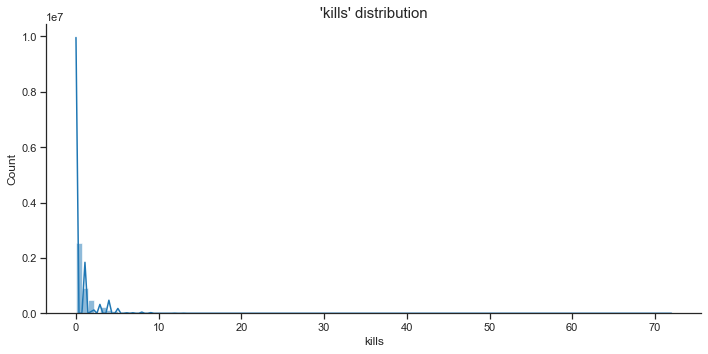

In [ ]:
# kills 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "kills", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'kills' distribution", fontsize = 15)
plt.show()

In [ ]:
# kills 결과 출력
column = "kills"
result_0 = f"> - {column}의 최소/최대는 {kills_describe_1['min']}(0 제외)/{kills_describe_1['max']}입니다."
result_1 = f"> - {column}가 0인 경우의 평균은 {kills_describe_0[0]}이고, 총 {kills_0}/{kills_rate_0}%입니다."
result_2 = f"> - {column}가 1인 경우의 평균은 {kills_describe_1[0]}이고, 총 {kills_1}/{kills_rate_1}%입니다."
result_3 = f"> - {column} 상위 10%의 경우는 총 {kills_top}/{kills_top_rate}%입니다."
print(result_0, result_1, result_2, result_3, sep = "\n")

> - kills의 최소/최대는 1.0(0 제외)/72.0입니다.
> - kills가 0인 경우의 평균은 0.92이고, 총 2529722/56.89%입니다.
> - kills가 1인 경우의 평균은 2.14이고, 총 1917244/43.11%입니다.
> - kills 상위 10%의 경우는 총 159715/3.59%입니다.


### (14) killStreaks

- Max number of enemy players killed in a short amount of time.
- 단 시간에 적을 가장 많이 킬한 수

> - killStreaks의 최소/최대는 1.0(0 제외)/20.0입니다.
> - killStreaks가 0인 경우의 평균은 0.54이고, 총 2529722/56.89%입니다.
> - killStreaks가 1인 경우의 평균은 1.26이고, 총 1917244/43.11%입니다.
> - killStreaks 상위 10%의 경우는 총 52340/1.18%입니다.

In [ ]:
# 상세 수 확인1(전체)
killStreaks_describe_0 = np.round(train["killStreaks"].describe().drop("count"), 2)
print(killStreaks_describe_0, "\n--------------")

# 상세 수 확인2(0 제외)
killStreaks_describe_1 = np.round(train["killStreaks"][train["killStreaks"] != 0].describe().drop("count"), 2)
print(killStreaks_describe_1)

mean     0.54
std      0.71
min      0.00
25%      0.00
50%      0.00
75%      1.00
max     20.00
Name: killStreaks, dtype: float64 
--------------
mean     1.26
std      0.52
min      1.00
25%      1.00
50%      1.00
75%      1.00
max     20.00
Name: killStreaks, dtype: float64


In [ ]:
# 상세 수 확인3(전체)
train["killStreaks"].value_counts().sort_index()

0     2529722
1     1475558
2      389346
3       45958
4        5711
5         409
6         126
7          54
8          32
9          18
10          9
11          8
12          5
13          5
14          2
16          1
18          1
20          1
Name: killStreaks, dtype: int64

In [ ]:
# killStreaks 여부에 따른 수와 비율 확인
killStreaks_0 = train["killStreaks"][train["killStreaks"] == 0].count()
killStreaks_rate_0 = np.round(killStreaks_0 / train_size * 100, 2)

# killStreaks 여부에 따른 수와 비율 확인(0 제외)
killStreaks_1 = train["killStreaks"][train["killStreaks"] != 0].count()
killStreaks_rate_1 = np.round(killStreaks_1 / train_size * 100, 2)

# killStreaks 상위 10% 확인(0 제외)
cond_1 = train["killStreaks"][train["killStreaks"] != 0].quantile(0.9)
cond_2 = train["killStreaks"].max()
killStreaks_top = pd.cut(train["killStreaks"], bins = [0, cond_1, cond_2], include_lowest = True).value_counts().values[-1]
killStreaks_top_rate = np.round(killStreaks_top / train_size * 100, 2)

print("killStreaks_0 :", killStreaks_0, "\nkillStreaks_rate_0 :", killStreaks_rate_0, "\n--------------")
print("killStreaks_1 :", killStreaks_1, "\nkillStreaks_rate_1 :", killStreaks_rate_1, "\n--------------")
print("killStreaks_top :", killStreaks_top, "\nkillStreaks_top_rate :", killStreaks_top_rate, "\n--------------")

killStreaks_0 : 2529722 
killStreaks_rate_0 : 56.89 
--------------
killStreaks_1 : 1917244 
killStreaks_rate_1 : 43.11 
--------------
killStreaks_top : 52340 
killStreaks_top_rate : 1.18 
--------------


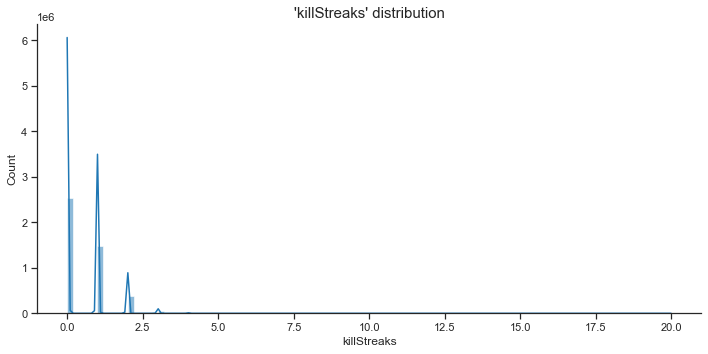

In [ ]:
# killStreaks 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "killStreaks", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'killStreaks' distribution", fontsize = 15)
plt.show()

In [ ]:
# killStreaks 결과 출력
column = "killStreaks"
result_0 = f"> - {column}의 최소/최대는 {killStreaks_describe_1['min']}(0 제외)/{killStreaks_describe_1['max']}입니다."
result_1 = f"> - {column}가 0인 경우의 평균은 {killStreaks_describe_0[0]}이고, 총 {killStreaks_0}/{killStreaks_rate_0}%입니다."
result_2 = f"> - {column}가 1인 경우의 평균은 {killStreaks_describe_1[0]}이고, 총 {killStreaks_1}/{killStreaks_rate_1}%입니다."
result_3 = f"> - {column} 상위 10%의 경우는 총 {killStreaks_top}/{killStreaks_top_rate}%입니다."
print(result_0, result_1, result_2, result_3, sep = "\n")

> - killStreaks의 최소/최대는 1.0(0 제외)/20.0입니다.
> - killStreaks가 0인 경우의 평균은 0.54이고, 총 2529722/56.89%입니다.
> - killStreaks가 1인 경우의 평균은 1.26이고, 총 1917244/43.11%입니다.
> - killStreaks 상위 10%의 경우는 총 52340/1.18%입니다.


### (15) longestKill

- Longest distance between player and player killed at time of death. 
- This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- 플레이어가 적을 킬한 최대 거리(최대 저격 거리)
- 적을 기절시킨 뒤, 차량으로 멀리 이동했을 때 적이 소생하지 못하고 죽었을 경우의 일부 데이터가 포함되어 있을 수 있습니다.

> - longestKill의 최소/최대는 0.02(0 제외)/1094.0입니다.
> - longestKill가 0인 경우의 평균은 23.0이고, 총 2538735/57.09%입니다.
> - longestKill가 1인 경우의 평균은 53.59이고, 총 1908231/42.91%입니다.
> - longestKill 상위 10%의 경우는 총 190722/4.29%입니다.

In [ ]:
# 상세 수 확인1(전체)
longestKill_describe_0 = np.round(train["longestKill"].describe().drop("count"), 2)
print(longestKill_describe_0, "\n--------------")

# 상세 수 확인2(0 제외)
longestKill_describe_1 = np.round(train["longestKill"][train["longestKill"] != 0].describe().drop("count"), 2)
print(longestKill_describe_1)

mean      23.00
std       50.97
min        0.00
25%        0.00
50%        0.00
75%       21.32
max     1094.00
Name: longestKill, dtype: float64 
--------------
mean      53.59
std       66.45
min        0.02
25%       11.03
50%       28.26
75%       70.66
max     1094.00
Name: longestKill, dtype: float64


In [ ]:
# 상세 수 확인3(전체)
train["longestKill"].value_counts().sort_index()

0.0000       2538735
0.0178             1
0.0232             1
0.0569             1
0.0641             1
              ...   
1071.0000          1
1072.0000          1
1075.0000          1
1081.0000          1
1094.0000          1
Name: longestKill, Length: 28284, dtype: int64

In [ ]:
# longestKill 여부에 따른 수와 비율 확인
longestKill_0 = train["longestKill"][train["longestKill"] == 0].count()
longestKill_rate_0 = np.round(longestKill_0 / train_size * 100, 2)

# longestKill 여부에 따른 수와 비율 확인(0 제외)
longestKill_1 = train["longestKill"][train["longestKill"] != 0].count()
longestKill_rate_1 = np.round(longestKill_1 / train_size * 100, 2)

# longestKill 상위 10% 확인(0 제외)
cond_1 = train["longestKill"][train["longestKill"] != 0].quantile(0.9)
cond_2 = train["longestKill"].max()
longestKill_top = pd.cut(train["longestKill"], bins = [0, cond_1, cond_2], include_lowest = True).value_counts().values[-1]
longestKill_top_rate = np.round(longestKill_top / train_size * 100, 2)

print("longestKill_0 :", longestKill_0, "\nlongestKill_rate_0 :", longestKill_rate_0, "\n--------------")
print("longestKill_1 :", longestKill_1, "\nlongestKill_rate_1 :", longestKill_rate_1, "\n--------------")
print("longestKill_top :", longestKill_top, "\nlongestKill_top_rate :", longestKill_top_rate, "\n--------------")

longestKill_0 : 2538735 
longestKill_rate_0 : 57.09 
--------------
longestKill_1 : 1908231 
longestKill_rate_1 : 42.91 
--------------
longestKill_top : 190722 
longestKill_top_rate : 4.29 
--------------


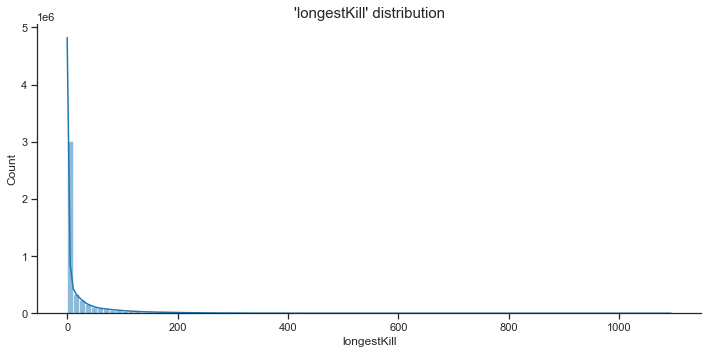

In [ ]:
# longestKill 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "longestKill", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'longestKill' distribution", fontsize = 15)
plt.show()

In [ ]:
# longestKill 결과 출력
column = "longestKill"
result_0 = f"> - {column}의 최소/최대는 {longestKill_describe_1['min']}(0 제외)/{longestKill_describe_1['max']}입니다."
result_1 = f"> - {column}가 0인 경우의 평균은 {longestKill_describe_0[0]}이고, 총 {longestKill_0}/{longestKill_rate_0}%입니다."
result_2 = f"> - {column}가 1인 경우의 평균은 {longestKill_describe_1[0]}이고, 총 {longestKill_1}/{longestKill_rate_1}%입니다."
result_3 = f"> - {column} 상위 10%의 경우는 총 {longestKill_top}/{longestKill_top_rate}%입니다."
print(result_0, result_1, result_2, result_3, sep = "\n")

> - longestKill의 최소/최대는 0.02(0 제외)/1094.0입니다.
> - longestKill가 0인 경우의 평균은 23.0이고, 총 2538735/57.09%입니다.
> - longestKill가 1인 경우의 평균은 53.59이고, 총 1908231/42.91%입니다.
> - longestKill 상위 10%의 경우는 총 190722/4.29%입니다.


### (16) matchDuration

- Duration of match in seconds.
- 경기 시간

> - matchDuration의 평균은 1579.51이고, 최소/최대는 9.0/2237.0입니다.
> - matchDuration의 경우의 수가 가장 적은 것은 9(1), 가장 큰 것은 1384(27764)입니다.
> - matchDuration 상위 10%의 경우는 총 442026/9.94%입니다.

In [ ]:
# 상세 수 확인1
matchDuration_describe = np.round(train["matchDuration"].describe().drop("count"), 2)
print(matchDuration_describe, "\n--------------")

mean    1579.51
std      258.74
min        9.00
25%     1367.00
50%     1438.00
75%     1851.00
max     2237.00
Name: matchDuration, dtype: float64 
--------------


In [ ]:
# 상세 수 확인2
matchDuration_vc = train["matchDuration"].value_counts().sort_index()
matchDuration_vc

9         1
133       2
152       7
209      20
246      11
       ... 
2214     99
2217     95
2218    100
2226     95
2237     97
Name: matchDuration, Length: 1267, dtype: int64

In [ ]:
# matchDuration value_counts 최소/최대 확인
matchDuration_vc_min = matchDuration_vc[matchDuration_vc.values == matchDuration_vc.min()]
matchDuration_vc_max = matchDuration_vc[matchDuration_vc.values == matchDuration_vc.max()]
print(matchDuration_vc_min, "\n--------------")
print(matchDuration_vc_max)

9    1
Name: matchDuration, dtype: int64 
--------------
1384    27764
Name: matchDuration, dtype: int64


In [ ]:
# matchDuration 상위 10% 확인
cond_1 = train["matchDuration"].quantile(0.9)
cond_2 = train["matchDuration"].max()
matchDuration_top = pd.cut(train["matchDuration"], bins = [0, cond_1, cond_2], include_lowest = True).value_counts().values[-1]
matchDuration_top_rate = np.round(matchDuration_top / train_size * 100, 2)
print("matchDuration_top :", matchDuration_top, "\nmatchDuration_top_rate :", matchDuration_top_rate)

matchDuration_top : 442026 
matchDuration_top_rate : 9.94


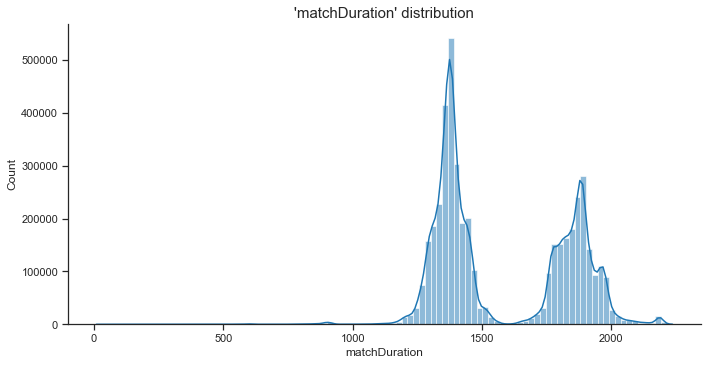

In [ ]:
# matchDuration 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "matchDuration", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'matchDuration' distribution", fontsize = 15)
plt.show()

In [ ]:
# matchDuration 결과 출력
column = "matchDuration"
result_0 = f"> - {column}의 평균은 {matchDuration_describe[0]}이고, 최소/최대는 {matchDuration_describe['min']}/{matchDuration_describe['max']}입니다."
result_1 = f"> - {column}의 경우의 수가 가장 적은 것은 {matchDuration_vc_min.index[0]}({matchDuration_vc_min.values[0]}), 가장 큰 것은 {matchDuration_vc_max.index[0]}({matchDuration_vc_max.values[0]})입니다."
result_2 = f"> - {column} 상위 10%의 경우는 총 {matchDuration_top}/{matchDuration_top_rate}%입니다."
print(result_0, result_1, result_2, sep = "\n")

> - matchDuration의 평균은 1579.51이고, 최소/최대는 9.0/2237.0입니다.
> - matchDuration의 경우의 수가 가장 적은 것은 9(1), 가장 큰 것은 1384(27764)입니다.
> - matchDuration 상위 10%의 경우는 총 442026/9.94%입니다.


### (17) maxPlace

- Worst placement we have data for in the match. 
- This may not match with numGroups, as sometimes the data skips over placements.
- 매치 중, 최악의 등수 / maxPlace은 일부 순위를 스킵할 수 있기에 numGroups와 일치하지 않을 수 있습니다.

> - maxPlace의 평균은 44.5이고, 최소/최대는 1.0/100.0입니다.
> - maxPlace의 경우의 수가 가장 적은 것은 1(1), 가장 큰 것은 28(626495)입니다.

In [ ]:
# 상세 수 확인1
maxPlace_describe = np.round(train["maxPlace"].describe().drop("count"), 2)
print(maxPlace_describe)

mean     44.50
std      23.83
min       1.00
25%      28.00
50%      30.00
75%      49.00
max     100.00
Name: maxPlace, dtype: float64


In [ ]:
# 상세 수 확인2
maxPlace_vc = train["maxPlace"].value_counts().sort_index()
maxPlace_vc

1           1
2         399
3         210
4         500
5         669
        ...  
96     113664
97     119892
98      86436
99      53163
100     13100
Name: maxPlace, Length: 100, dtype: int64

In [ ]:
# maxPlace value_counts 최소/최대 확인
maxPlace_vc_min = maxPlace_vc[maxPlace_vc.values == maxPlace_vc.min()]
maxPlace_vc_max = maxPlace_vc[maxPlace_vc.values == maxPlace_vc.max()]
print(maxPlace_vc_min, "\n--------------")
print(maxPlace_vc_max)

1    1
Name: maxPlace, dtype: int64 
--------------
28    626495
Name: maxPlace, dtype: int64


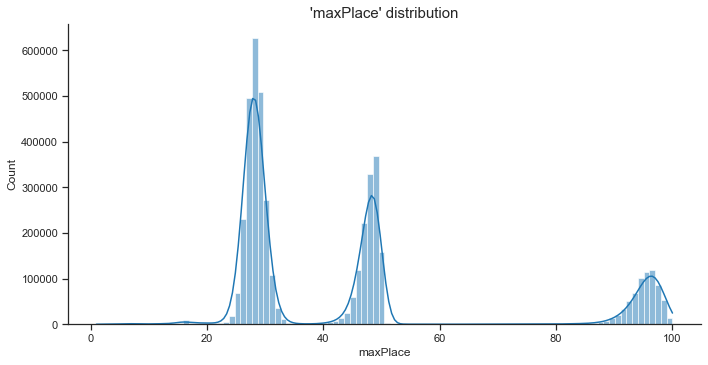

In [ ]:
# maxPlace 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "maxPlace", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'maxPlace' distribution", fontsize = 15)
plt.show()

In [ ]:
# maxPlace 결과 출력
column = "maxPlace"
result_1 = f"> - {column}의 평균은 {maxPlace_describe[0]}이고, 최소/최대는 {maxPlace_describe['min']}/{maxPlace_describe['max']}입니다."
result_2 = f"> - {column}의 경우의 수가 가장 적은 것은 {maxPlace_vc_min.index[0]}({maxPlace_vc_min.values[0]}), 가장 큰 것은 {maxPlace_vc_max.index[0]}({maxPlace_vc_max.values[0]})입니다."
print(result_1, result_2, sep = "\n")

> - maxPlace의 평균은 44.5이고, 최소/최대는 1.0/100.0입니다.
> - maxPlace의 경우의 수가 가장 적은 것은 1(1), 가장 큰 것은 28(626495)입니다.


### (18) numGroups

- Number of groups we have data for in the match.
- 매치에 참여한 그룹의 수

> - numGroups의 평균은 43.01이고, 최소/최대는 1.0/100.0입니다.
> - numGroups의 경우의 수가 가장 적은 것은 55(56), 가장 큰 것은 27(537607)입니다.

In [ ]:
# 상세 수 확인1
numGroups_describe = np.round(train["numGroups"].describe().drop("count"), 2)
print(numGroups_describe)

mean     43.01
std      23.29
min       1.00
25%      27.00
50%      30.00
75%      47.00
max     100.00
Name: numGroups, dtype: float64


In [ ]:
# 상세 수 확인2
numGroups_vc = train["numGroups"].value_counts().sort_index()
numGroups_vc

1       1147
2       6750
3        315
4        522
5        702
       ...  
96     67914
97     47115
98     22030
99      8052
100      700
Name: numGroups, Length: 100, dtype: int64

In [ ]:
# numGroups value_counts 최소/최대 확인
numGroups_vc_min = numGroups_vc[numGroups_vc.values == numGroups_vc.min()]
numGroups_vc_max = numGroups_vc[numGroups_vc.values == numGroups_vc.max()]
print(numGroups_vc_min, "\n--------------")
print(numGroups_vc_max)

55    56
Name: numGroups, dtype: int64 
--------------
27    537607
Name: numGroups, dtype: int64


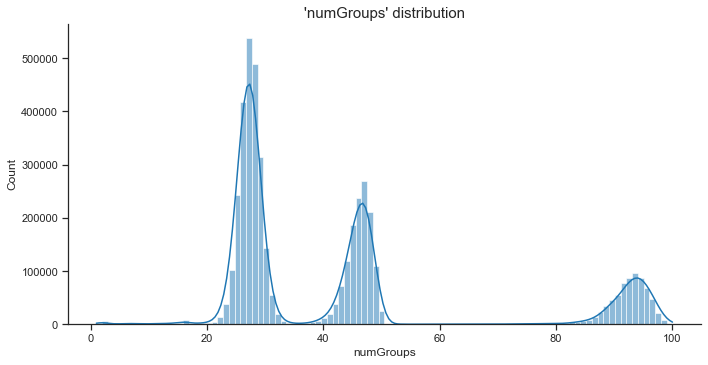

In [ ]:
# numGroups 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "numGroups", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'numGroups' distribution", fontsize = 15)
plt.show()

In [ ]:
# numGroups 결과 출력
column = "numGroups"
result_1 = f"> - {column}의 평균은 {numGroups_describe[0]}이고, 최소/최대는 {numGroups_describe['min']}/{numGroups_describe['max']}입니다."
result_2 = f"> - {column}의 경우의 수가 가장 적은 것은 {numGroups_vc_min.index[0]}({numGroups_vc_min.values[0]}), 가장 큰 것은 {numGroups_vc_max.index[0]}({numGroups_vc_max.values[0]})입니다."
print(result_1, result_2, sep = "\n")

> - numGroups의 평균은 43.01이고, 최소/최대는 1.0/100.0입니다.
> - numGroups의 경우의 수가 가장 적은 것은 55(56), 가장 큰 것은 27(537607)입니다.


### (19) rankPoints

- Elo-like ranking of player. 
- This ranking is inconsistent, so use with caution. Value of -1 takes place of “None”.
- Elo 방식의 플레이어 랭킹 / 랭킹이 일관적이지 않을 수 있으므로 주의 / -1 값은 None 순위 의미

> - rankPoints의 최소/최대는 100.0(-1, 0 제외)/5910.0입니다.
> - rankPoints가 -1 또는 0인 경우의 평균은 892.01이고, 총 1791319/40.28%입니다.
> - rankPoints가 1인 경우의 평균은 1494.34이고, 총 2655647/59.72%입니다.
> - rankPoints의 경우의 수가 가장 큰 것은 -1(1701810)입니다.
> - rankPoints 상위 10%의 경우는 총 264196/5.94%입니다.

In [ ]:
# 상세 수 확인1(전체)
rankPoints_describe_0 = np.round(train["rankPoints"].describe().drop("count"), 2)
print(rankPoints_describe_0, "\n--------------")

# 상세 수 확인2(-1, 0제외)
rankPoints_describe_1 = np.round(train["rankPoints"][train["rankPoints"] > 0].describe().drop("count"), 2)
print(rankPoints_describe_1)

mean     892.01
std      736.65
min       -1.00
25%       -1.00
50%     1443.00
75%     1500.00
max     5910.00
Name: rankPoints, dtype: float64 
--------------
mean    1494.34
std       89.58
min      100.00
25%     1465.00
50%     1496.00
75%     1513.00
max     5910.00
Name: rankPoints, dtype: float64


In [ ]:
# 상세 수 확인3(전체)
rankPoints_vc = train["rankPoints"].value_counts().sort_index()
rankPoints_vc

-1       1701810
 0         89509
 100         514
 105           1
 108           2
          ...   
 5698          1
 5725          1
 5820          1
 5827          1
 5910          1
Name: rankPoints, Length: 2262, dtype: int64

In [ ]:
# rankPoints 여부에 따른 수와 비율 확인
rankPoints_0 = train["rankPoints"][train["rankPoints"] <= 0].count()
rankPoints_rate_0 = np.round(rankPoints_0 / train_size * 100, 2)

# rankPoints 여부에 따른 수와 비율 확인(-1, 0 제외)
rankPoints_1 = train["rankPoints"][train["rankPoints"] > 0].count()
rankPoints_rate_1 = np.round(rankPoints_1 / train_size * 100, 2)

# rankPoints 상위 10% 확인(-1, 0 제외)
cond_1 = train["rankPoints"][train["rankPoints"] > 0].quantile(0.9)
cond_2 = train["rankPoints"].max()
rankPoints_top = pd.cut(train["rankPoints"], bins = [0, cond_1, cond_2], include_lowest = True).value_counts().values[-1]
rankPoints_top_rate = np.round(rankPoints_top / train_size * 100, 2)

print("rankPoints_0 :", rankPoints_0, "\nrankPoints_rate_0 :", rankPoints_rate_0, "\n--------------")
print("rankPoints_1 :", rankPoints_1, "\nrankPoints_rate_1 :", rankPoints_rate_1, "\n--------------")
print("rankPoints_top :", rankPoints_top, "\nrankPoints_top_rate :", rankPoints_top_rate, "\n--------------")

rankPoints_0 : 1791319 
rankPoints_rate_0 : 40.28 
--------------
rankPoints_1 : 2655647 
rankPoints_rate_1 : 59.72 
--------------
rankPoints_top : 264196 
rankPoints_top_rate : 5.94 
--------------


In [ ]:
# rankPoints value_counts 최소/최대 확인
rankPoints_vc_min = rankPoints_vc[rankPoints_vc.values == rankPoints_vc.min()]
rankPoints_vc_max = rankPoints_vc[rankPoints_vc.values == rankPoints_vc.max()]
print(rankPoints_vc_min, "\n--------------")
print(rankPoints_vc_max)

105     1
130     1
135     1
146     1
159     1
       ..
5698    1
5725    1
5820    1
5827    1
5910    1
Name: rankPoints, Length: 496, dtype: int64 
--------------
-1    1701810
Name: rankPoints, dtype: int64


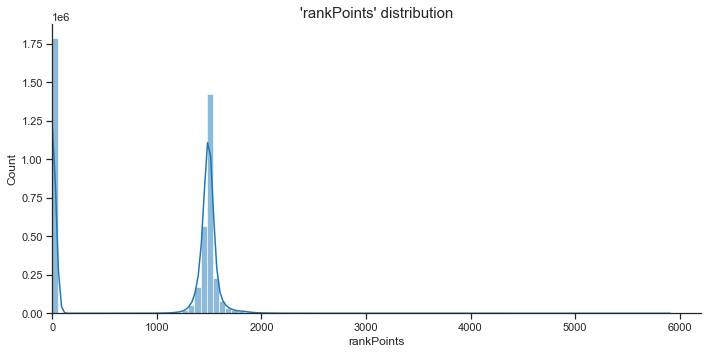

In [ ]:
# rankPoints 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "rankPoints", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'rankPoints' distribution", fontsize = 15)
plt.xlim(-1)
plt.show()

In [ ]:
# rankPoints 결과 출력
column = "rankPoints"
result_0 = f"> - {column}의 최소/최대는 {rankPoints_describe_1['min']}(-1, 0 제외)/{rankPoints_describe_1['max']}입니다."
result_1 = f"> - {column}가 -1 또는 0인 경우의 평균은 {rankPoints_describe_0[0]}이고, 총 {rankPoints_0}/{rankPoints_rate_0}%입니다."
result_2 = f"> - {column}가 1인 경우의 평균은 {rankPoints_describe_1[0]}이고, 총 {rankPoints_1}/{rankPoints_rate_1}%입니다."
result_3 = f"> - {column}의 경우의 수가 가장 큰 것은 {rankPoints_vc_max.index[0]}({rankPoints_vc_max.values[0]})입니다."
result_4 = f"> - {column} 상위 10%의 경우는 총 {rankPoints_top}/{rankPoints_top_rate}%입니다."
print(result_0, result_1, result_2, result_3, result_4, sep = "\n")


> - rankPoints의 최소/최대는 100.0(-1, 0 제외)/5910.0입니다.
> - rankPoints가 -1 또는 0인 경우의 평균은 892.01이고, 총 1791319/40.28%입니다.
> - rankPoints가 1인 경우의 평균은 1494.34이고, 총 2655647/59.72%입니다.
> - rankPoints의 경우의 수가 가장 큰 것은 -1(1701810)입니다.
> - rankPoints 상위 10%의 경우는 총 264196/5.94%입니다.


### (20) revives

- Number of times this player revived teammates.
- 팀원을 소생시킨 수

> - revives의 최소/최대는 1.0(0 제외)/39.0입니다.
> - revives가 0인 경우의 평균은 0.16이고, 총 3859867/86.8%입니다.
> - revives가 1인 경우의 평균은 1.25이고, 총 587099/13.2%입니다.
> - revives 상위 10%의 경우는 총 21444/0.48%입니다.

In [ ]:
# 상세 수 확인1(전체)
revives_describe_0 = np.round(train["revives"].describe().drop("count"), 2)
print(revives_describe_0, "\n--------------")

# 상세 수 확인2(0 제외)
revives_describe_1 = np.round(train["revives"][train["revives"] != 0].describe().drop("count"), 2)
print(revives_describe_1)

mean     0.16
std      0.47
min      0.00
25%      0.00
50%      0.00
75%      0.00
max     39.00
Name: revives, dtype: float64 
--------------
mean     1.25
std      0.58
min      1.00
25%      1.00
50%      1.00
75%      1.00
max     39.00
Name: revives, dtype: float64


In [ ]:
# 상세 수 확인3(전체)
train["revives"].value_counts().sort_index()

0     3859867
1      470110
2       95545
3       17333
4        3102
5         606
6         142
7          72
8          43
9          26
10         25
11         23
12         12
13          7
14         10
15         13
16          6
17          6
18          7
19          3
20          2
23          3
28          1
32          1
39          1
Name: revives, dtype: int64

In [ ]:
# revives 여부에 따른 수와 비율 확인
revives_0 = train["revives"][train["revives"] == 0].count()
revives_rate_0 = np.round(revives_0 / train_size * 100, 2)

# revives 여부에 따른 수와 비율 확인(0 제외)
revives_1 = train["revives"][train["revives"] != 0].count()
revives_rate_1 = np.round(revives_1 / train_size * 100, 2)

# revives 상위 10% 확인(0 제외)
cond_1 = train["revives"][train["revives"] != 0].quantile(0.9)
cond_2 = train["revives"].max()
revives_top = pd.cut(train["revives"], bins = [0, cond_1, cond_2], include_lowest = True).value_counts().values[-1]
revives_top_rate = np.round(revives_top / train_size * 100, 2)

print("revives_0 :", revives_0, "\nrevives_rate_0 :", revives_rate_0, "\n--------------")
print("revives_1 :", revives_1, "\nrevives_rate_1 :", revives_rate_1, "\n--------------")
print("revives_top :", revives_top, "\nrevives_top_rate :", revives_top_rate, "\n--------------")

revives_0 : 3859867 
revives_rate_0 : 86.8 
--------------
revives_1 : 587099 
revives_rate_1 : 13.2 
--------------
revives_top : 21444 
revives_top_rate : 0.48 
--------------


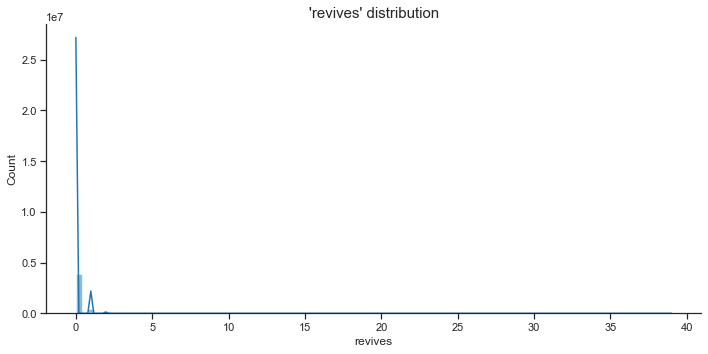

In [ ]:
# revives 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "revives", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'revives' distribution", fontsize = 15)
plt.show()

In [ ]:
# revives 결과 출력
column = "revives"
result_0 = f"> - {column}의 최소/최대는 {revives_describe_1['min']}(0 제외)/{revives_describe_1['max']}입니다."
result_1 = f"> - {column}가 0인 경우의 평균은 {revives_describe_0[0]}이고, 총 {revives_0}/{revives_rate_0}%입니다."
result_2 = f"> - {column}가 1인 경우의 평균은 {revives_describe_1[0]}이고, 총 {revives_1}/{revives_rate_1}%입니다."
result_3 = f"> - {column} 상위 10%의 경우는 총 {revives_top}/{revives_top_rate}%입니다."
print(result_0, result_1, result_2, result_3, sep = "\n")

> - revives의 최소/최대는 1.0(0 제외)/39.0입니다.
> - revives가 0인 경우의 평균은 0.16이고, 총 3859867/86.8%입니다.
> - revives가 1인 경우의 평균은 1.25이고, 총 587099/13.2%입니다.
> - revives 상위 10%의 경우는 총 21444/0.48%입니다.


### (21) rideDistance

- Total distance traveled in vehicles measured in meters.
- 차량으로 이동한 총 거리(미터 단위)

> - rideDistance의 최소/최대는 0.0001(0 제외)/40710.0입니다.
> - rideDistance가 0인 경우의 평균은 606.116이고, 총 3309429/74.42%입니다.
> - rideDistance가 1인 경우의 평균은 2369.4844이고, 총 1137537/25.58%입니다.
> - rideDistance 상위 10%의 경우는 총 113691/2.56%입니다.

In [ ]:
# 상세 수 확인1(전체)
rideDistance_describe_0 = np.round(train["rideDistance"].describe().drop("count"), 4)
print(rideDistance_describe_0, "\n--------------")

# 상세 수 확인2(0 제외)
rideDistance_describe_1 = np.round(train["rideDistance"][train["rideDistance"] != 0].describe().drop("count"), 4)
print(rideDistance_describe_1)

mean      606.1160
std      1498.3435
min         0.0000
25%         0.0000
50%         0.0000
75%         0.1910
max     40710.0000
Name: rideDistance, dtype: float64 
--------------
mean     2369.4844
std      2144.3467
min         0.0001
25%       713.0000
50%      1742.0000
75%      3497.0000
max     40710.0000
Name: rideDistance, dtype: float64


In [ ]:
# 상세 수 확인3(전체)
train["rideDistance"].value_counts().sort_index()

0.0000        3309429
0.0001              7
0.0002             28
0.0003             57
0.0004             42
               ...   
32450.0000          1
33970.0000          1
35400.0000          1
37670.0000          1
40710.0000          1
Name: rideDistance, Length: 33562, dtype: int64

In [ ]:
# rideDistance 여부에 따른 수와 비율 확인
rideDistance_0 = train["rideDistance"][train["rideDistance"] == 0].count()
rideDistance_rate_0 = np.round(rideDistance_0 / train_size * 100, 2)

# rideDistance 여부에 따른 수와 비율 확인(0 제외)
rideDistance_1 = train["rideDistance"][train["rideDistance"] != 0].count()
rideDistance_rate_1 = np.round(rideDistance_1 / train_size * 100, 2)

# rideDistance 상위 10% 확인(0 제외)
cond_1 = train["rideDistance"][train["rideDistance"] != 0].quantile(0.9)
cond_2 = train["rideDistance"].max()
rideDistance_top = pd.cut(train["rideDistance"], bins = [0, cond_1, cond_2], include_lowest = True).value_counts().values[-1]
rideDistance_top_rate = np.round(rideDistance_top / train_size * 100, 2)

print("rideDistance_0 :", rideDistance_0, "\nrideDistance_rate_0 :", rideDistance_rate_0, "\n--------------")
print("rideDistance_1 :", rideDistance_1, "\nrideDistance_rate_1 :", rideDistance_rate_1, "\n--------------")
print("rideDistance_top :", rideDistance_top, "\nrideDistance_top_rate :", rideDistance_top_rate, "\n--------------")

rideDistance_0 : 3309429 
rideDistance_rate_0 : 74.42 
--------------
rideDistance_1 : 1137537 
rideDistance_rate_1 : 25.58 
--------------
rideDistance_top : 113691 
rideDistance_top_rate : 2.56 
--------------


In [ ]:
train.loc[train["rideDistance"] == train["rideDistance"].max(), "winPlacePerc"]

4099938    0.8478
Name: winPlacePerc, dtype: float32

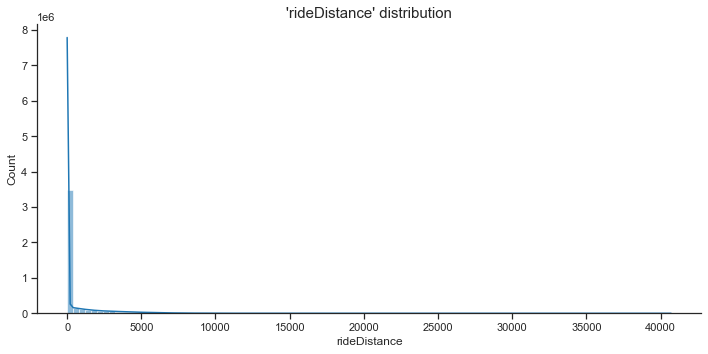

In [ ]:
# rideDistance 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "rideDistance", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'rideDistance' distribution", fontsize = 15)
plt.show()

In [ ]:
# rideDistance 결과 출력
column = "rideDistance"
result_0 = f"> - {column}의 최소/최대는 {rideDistance_describe_1['min']}(0 제외)/{rideDistance_describe_1['max']}입니다."
result_1 = f"> - {column}가 0인 경우의 평균은 {rideDistance_describe_0[0]}이고, 총 {rideDistance_0}/{rideDistance_rate_0}%입니다."
result_2 = f"> - {column}가 1인 경우의 평균은 {rideDistance_describe_1[0]}이고, 총 {rideDistance_1}/{rideDistance_rate_1}%입니다."
result_3 = f"> - {column} 상위 10%의 경우는 총 {rideDistance_top}/{rideDistance_top_rate}%입니다."
print(result_0, result_1, result_2, result_3, sep = "\n")

> - rideDistance의 최소/최대는 0.0001(0 제외)/40710.0입니다.
> - rideDistance가 0인 경우의 평균은 606.116이고, 총 3309429/74.42%입니다.
> - rideDistance가 1인 경우의 평균은 2369.4844이고, 총 1137537/25.58%입니다.
> - rideDistance 상위 10%의 경우는 총 113691/2.56%입니다.


### (22) roadKills

- Number of kills while in a vehicle.
- 차량으로 적을 킬한 수

> - roadKills의 최소/최대는 1.0(0 제외)/18.0입니다.
> - roadKills가 0인 경우의 평균은 0.0035이고, 총 4433970/99.71%입니다.
> - roadKills가 1인 경우의 평균은 1.1963이고, 총 12996/0.29%입니다.

In [ ]:
# 상세 수 확인1(전체)
roadKills_describe_0 = np.round(train["roadKills"].describe().drop("count"), 4)
print(roadKills_describe_0, "\n--------------")

# 상세 수 확인2(0 제외)
roadKills_describe_1 = np.round(train["roadKills"][train["roadKills"] != 0].describe().drop("count"), 4)
print(roadKills_describe_1)

mean     0.0035
std      0.0734
min      0.0000
25%      0.0000
50%      0.0000
75%      0.0000
max     18.0000
Name: roadKills, dtype: float64 
--------------
mean     1.1963
std      0.6444
min      1.0000
25%      1.0000
50%      1.0000
75%      1.0000
max     18.0000
Name: roadKills, dtype: float64


In [ ]:
# 상세 수 확인3(전체)
train["roadKills"].value_counts().sort_index()

0     4433970
1       11247
2        1298
3         297
4          72
5          36
6          20
7          11
8           7
9           2
10          2
11          2
14          1
18          1
Name: roadKills, dtype: int64

In [ ]:
# roadKills 여부에 따른 수와 비율 확인
roadKills_0 = train["roadKills"][train["roadKills"] == 0].count()
roadKills_rate_0 = np.round(roadKills_0 / train_size * 100, 2)

# roadKills 여부에 따른 수와 비율 확인(0 제외)
roadKills_1 = train["roadKills"][train["roadKills"] != 0].count()
roadKills_rate_1 = np.round(roadKills_1 / train_size * 100, 2)

print("roadKills_0 :", roadKills_0, "\nroadKills_rate_0 :", roadKills_rate_0, "\n--------------")
print("roadKills_1 :", roadKills_1, "\nroadKills_rate_1 :", roadKills_rate_1, "\n--------------")

roadKills_0 : 4433970 
roadKills_rate_0 : 99.71 
--------------
roadKills_1 : 12996 
roadKills_rate_1 : 0.29 
--------------


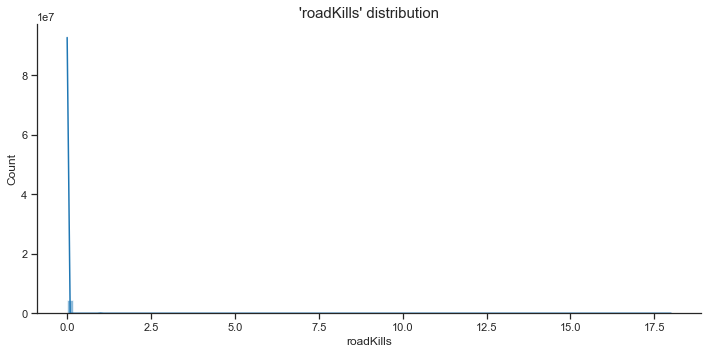

In [ ]:
# roadKills 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "roadKills", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'roadKills' distribution", fontsize = 15)
plt.show()

In [ ]:
# roadKills 결과 출력
column = "roadKills"
result_0 = f"> - {column}의 최소/최대는 {roadKills_describe_1['min']}(0 제외)/{roadKills_describe_1['max']}입니다."
result_1 = f"> - {column}가 0인 경우의 평균은 {roadKills_describe_0[0]}이고, 총 {roadKills_0}/{roadKills_rate_0}%입니다."
result_2 = f"> - {column}가 1인 경우의 평균은 {roadKills_describe_1[0]}이고, 총 {roadKills_1}/{roadKills_rate_1}%입니다."
print(result_0, result_1, result_2, sep = "\n")

> - roadKills의 최소/최대는 1.0(0 제외)/18.0입니다.
> - roadKills가 0인 경우의 평균은 0.0035이고, 총 4433970/99.71%입니다.
> - roadKills가 1인 경우의 평균은 1.1963이고, 총 12996/0.29%입니다.


### (23) swimDistance

- Total distance traveled by swimming measured in meters.
- 수영으로 이동한 총 거리(미터 단위)

> - swimDistance의 최소/최대는 0.0001(0 제외)/3823.0입니다.
> - swimDistance가 0인 경우의 평균은 4.5093이고, 총 4157694/93.5%입니다.
> - swimDistance가 1인 경우의 평균은 69.3216이고, 총 289272/6.5%입니다.
> - swimDistance 상위 10%의 경우는 총 28919/0.65%입니다.

In [ ]:
# 상세 수 확인1(전체)
swimDistance_describe_0 = np.round(train["swimDistance"].describe().drop("count"), 4)
print(swimDistance_describe_0, "\n--------------")

# 상세 수 확인2(0 제외)
swimDistance_describe_1 = np.round(train["swimDistance"][train["swimDistance"] != 0].describe().drop("count"), 4)
print(swimDistance_describe_1)

mean       4.5093
std       30.5022
min        0.0000
25%        0.0000
50%        0.0000
75%        0.0000
max     3823.0000
Name: swimDistance, dtype: float64 
--------------
mean      69.3216
std       99.0449
min        0.0001
25%       12.7300
50%       37.1700
75%       85.1100
max     3823.0000
Name: swimDistance, dtype: float64


In [ ]:
# 상세 수 확인3(전체)
train["swimDistance"].value_counts().sort_index()

0.0000       4157694
0.0001             1
0.0002            22
0.0003            32
0.0004            13
              ...   
2484.0000          1
2668.0000          1
2718.0000          1
3514.0000          1
3823.0000          1
Name: swimDistance, Length: 28345, dtype: int64

In [ ]:
# swimDistance 여부에 따른 수와 비율 확인
swimDistance_0 = train["swimDistance"][train["swimDistance"] == 0].count()
swimDistance_rate_0 = np.round(swimDistance_0 / train_size * 100, 2)

# swimDistance 여부에 따른 수와 비율 확인(0 제외)
swimDistance_1 = train["swimDistance"][train["swimDistance"] != 0].count()
swimDistance_rate_1 = np.round(swimDistance_1 / train_size * 100, 2)

# swimDistance 상위 10% 확인(0 제외)
cond_1 = train["swimDistance"][train["swimDistance"] != 0].quantile(0.9)
cond_2 = train["swimDistance"].max()
swimDistance_top = pd.cut(train["swimDistance"], bins = [0, cond_1, cond_2], include_lowest = True).value_counts().values[-1]
swimDistance_top_rate = np.round(swimDistance_top / train_size * 100, 2)

print("swimDistance_0 :", swimDistance_0, "\nswimDistance_rate_0 :", swimDistance_rate_0, "\n--------------")
print("swimDistance_1 :", swimDistance_1, "\nswimDistance_rate_1 :", swimDistance_rate_1, "\n--------------")
print("swimDistance_top :", swimDistance_top, "\nswimDistance_top_rate :", swimDistance_top_rate, "\n--------------")

swimDistance_0 : 4157694 
swimDistance_rate_0 : 93.5 
--------------
swimDistance_1 : 289272 
swimDistance_rate_1 : 6.5 
--------------
swimDistance_top : 28919 
swimDistance_top_rate : 0.65 
--------------


In [ ]:
train.loc[train["swimDistance"] == train["swimDistance"].max(), "winPlacePerc"]

1227362    1.0
Name: winPlacePerc, dtype: float32

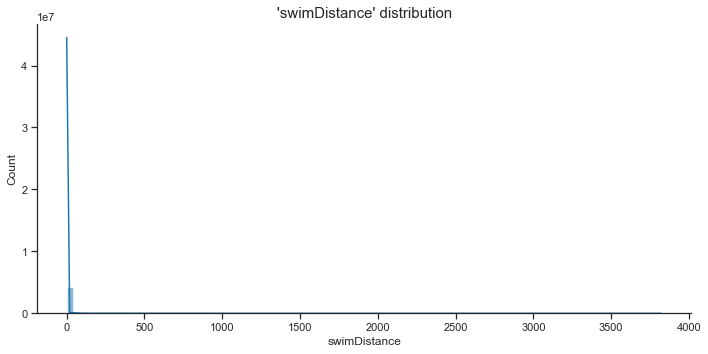

In [ ]:
# swimDistance 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "swimDistance", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'swimDistance' distribution", fontsize = 15)
plt.show()

In [ ]:
# swimDistance 결과 출력
column = "swimDistance"
result_0 = f"> - {column}의 최소/최대는 {swimDistance_describe_1['min']}(0 제외)/{swimDistance_describe_1['max']}입니다."
result_1 = f"> - {column}가 0인 경우의 평균은 {swimDistance_describe_0[0]}이고, 총 {swimDistance_0}/{swimDistance_rate_0}%입니다."
result_2 = f"> - {column}가 1인 경우의 평균은 {swimDistance_describe_1[0]}이고, 총 {swimDistance_1}/{swimDistance_rate_1}%입니다."
result_3 = f"> - {column} 상위 10%의 경우는 총 {swimDistance_top}/{swimDistance_top_rate}%입니다."
print(result_0, result_1, result_2, result_3, sep = "\n")

> - swimDistance의 최소/최대는 0.0001(0 제외)/3823.0입니다.
> - swimDistance가 0인 경우의 평균은 4.5093이고, 총 4157694/93.5%입니다.
> - swimDistance가 1인 경우의 평균은 69.3216이고, 총 289272/6.5%입니다.
> - swimDistance 상위 10%의 경우는 총 28919/0.65%입니다.


### (24) teamKills

- Number of times this player killed a teammate.
- 팀원을 킬한 수

> - teamKills의 최소/최대는 1.0(0 제외)/12.0입니다.
> - teamKills가 0인 경우의 평균은 0.02이고, 총 4350036/97.82%입니다.
> - teamKills가 1인 경우의 평균은 1.1이고, 총 96930/2.18%입니다.

In [ ]:
# 상세 수 확인1(전체)
teamKills_describe_0 = np.round(train["teamKills"].describe().drop("count"), 2)
print(teamKills_describe_0, "\n--------------")

# 상세 수 확인2(0 제외)
teamKills_describe_1 = np.round(train["teamKills"][train["teamKills"] != 0].describe().drop("count"), 2)
print(teamKills_describe_1)

mean     0.02
std      0.17
min      0.00
25%      0.00
50%      0.00
75%      0.00
max     12.00
Name: teamKills, dtype: float64 
--------------
mean     1.10
std      0.34
min      1.00
25%      1.00
50%      1.00
75%      1.00
max     12.00
Name: teamKills, dtype: float64


In [ ]:
# 상세 수 확인3(전체)
train["teamKills"].value_counts().sort_index()

0     4350036
1       88771
2        7236
3         829
4          81
5           7
6           1
7           1
8           1
10          2
12          1
Name: teamKills, dtype: int64

In [ ]:
# teamKills 여부에 따른 수와 비율 확인
teamKills_0 = train["teamKills"][train["teamKills"] == 0].count()
teamKills_rate_0 = np.round(teamKills_0 / train_size * 100, 2)

# teamKills 여부에 따른 수와 비율 확인(0 제외)
teamKills_1 = train["teamKills"][train["teamKills"] != 0].count()
teamKills_rate_1 = np.round(teamKills_1 / train_size * 100, 2)

print("teamKills_0 :", teamKills_0, "\nteamKills_rate_0 :", teamKills_rate_0, "\n--------------")
print("teamKills_1 :", teamKills_1, "\nteamKills_rate_1 :", teamKills_rate_1, "\n--------------")

teamKills_0 : 4350036 
teamKills_rate_0 : 97.82 
--------------
teamKills_1 : 96930 
teamKills_rate_1 : 2.18 
--------------


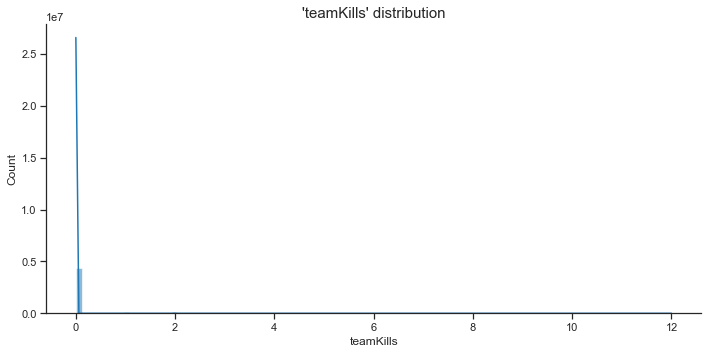

In [ ]:
# teamKills 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "teamKills", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'teamKills' distribution", fontsize = 15)
plt.show()

In [ ]:
# teamKills 결과 출력
column = "teamKills"
result_0 = f"> - {column}의 최소/최대는 {teamKills_describe_1['min']}(0 제외)/{teamKills_describe_1['max']}입니다."
result_1 = f"> - {column}가 0인 경우의 평균은 {teamKills_describe_0[0]}이고, 총 {teamKills_0}/{teamKills_rate_0}%입니다."
result_2 = f"> - {column}가 1인 경우의 평균은 {teamKills_describe_1[0]}이고, 총 {teamKills_1}/{teamKills_rate_1}%입니다."
print(result_0, result_1, result_2, sep = "\n")

> - teamKills의 최소/최대는 1.0(0 제외)/12.0입니다.
> - teamKills가 0인 경우의 평균은 0.02이고, 총 4350036/97.82%입니다.
> - teamKills가 1인 경우의 평균은 1.1이고, 총 96930/2.18%입니다.


### (25) vehicleDestroys

- Number of vehicles destrmoyed.
- 차량을 폭파시킨 수

> - vehicleDestroys의 최소/최대는 1.0(0 제외)/5.0입니다.
> - vehicleDestroys가 0인 경우의 평균은 0.01이고, 총 4413212/99.24%입니다.
> - vehicleDestroys가 1인 경우의 평균은 1.04이고, 총 33754/0.76%입니다.

In [ ]:
# 상세 수 확인1(전체)
vehicleDestroys_describe_0 = np.round(train["vehicleDestroys"].describe().drop("count"), 2)
print(vehicleDestroys_describe_0, "\n--------------")

# 상세 수 확인2(0 제외)
vehicleDestroys_describe_1 = np.round(train["vehicleDestroys"][train["vehicleDestroys"] != 0].describe().drop("count"), 2)
print(vehicleDestroys_describe_1)

mean    0.01
std     0.09
min     0.00
25%     0.00
50%     0.00
75%     0.00
max     5.00
Name: vehicleDestroys, dtype: float64 
--------------
mean    1.04
std     0.22
min     1.00
25%     1.00
50%     1.00
75%     1.00
max     5.00
Name: vehicleDestroys, dtype: float64


In [ ]:
# 상세 수 확인3(전체)
train["vehicleDestroys"].value_counts().sort_index()

0    4413212
1      32422
2       1223
3         95
4         11
5          3
Name: vehicleDestroys, dtype: int64

In [ ]:
# vehicleDestroys 여부에 따른 수와 비율 확인
vehicleDestroys_0 = train["vehicleDestroys"][train["vehicleDestroys"] == 0].count()
vehicleDestroys_rate_0 = np.round(vehicleDestroys_0 / train_size * 100, 2)

# vehicleDestroys 여부에 따른 수와 비율 확인(0 제외)
vehicleDestroys_1 = train["vehicleDestroys"][train["vehicleDestroys"] != 0].count()
vehicleDestroys_rate_1 = np.round(vehicleDestroys_1 / train_size * 100, 2)

print("vehicleDestroys_0 :", vehicleDestroys_0, "\nvehicleDestroys_rate_0 :", vehicleDestroys_rate_0, "\n--------------")
print("vehicleDestroys_1 :", vehicleDestroys_1, "\nvehicleDestroys_rate_1 :", vehicleDestroys_rate_1, "\n--------------")

vehicleDestroys_0 : 4413212 
vehicleDestroys_rate_0 : 99.24 
--------------
vehicleDestroys_1 : 33754 
vehicleDestroys_rate_1 : 0.76 
--------------


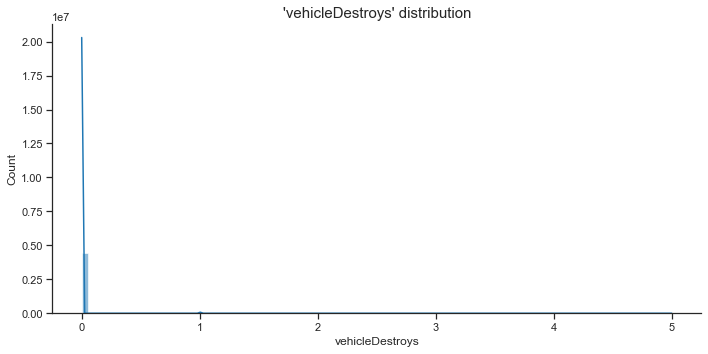

In [ ]:
# vehicleDestroys 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "vehicleDestroys", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'vehicleDestroys' distribution", fontsize = 15)
plt.show()

In [ ]:
# vehicleDestroys 결과 출력
column = "vehicleDestroys"
result_0 = f"> - {column}의 최소/최대는 {vehicleDestroys_describe_1['min']}(0 제외)/{vehicleDestroys_describe_1['max']}입니다."
result_1 = f"> - {column}가 0인 경우의 평균은 {vehicleDestroys_describe_0[0]}이고, 총 {vehicleDestroys_0}/{vehicleDestroys_rate_0}%입니다."
result_2 = f"> - {column}가 1인 경우의 평균은 {vehicleDestroys_describe_1[0]}이고, 총 {vehicleDestroys_1}/{vehicleDestroys_rate_1}%입니다."
print(result_0, result_1, result_2, sep = "\n")

> - vehicleDestroys의 최소/최대는 1.0(0 제외)/5.0입니다.
> - vehicleDestroys가 0인 경우의 평균은 0.01이고, 총 4413212/99.24%입니다.
> - vehicleDestroys가 1인 경우의 평균은 1.04이고, 총 33754/0.76%입니다.


### (26) walkDistance

- Total distance traveled on foot measured in meters.
- 걸어서 이동한 총 거리(미터 단위)

> - walkDistance의 최소/최대는 0.0001(0 제외)/25780.0입니다.
> - walkDistance가 0인 경우의 평균은 1154.2175이고, 총 99603/2.24%입니다.
> - walkDistance가 1인 경우의 평균은 1180.6626이고, 총 4347363/97.76%입니다.

In [ ]:
# 상세 수 확인1(전체)
walkDistance_describe_0 = np.round(train["walkDistance"].describe().drop("count"), 4)
print(walkDistance_describe_0, "\n--------------")

# 상세 수 확인2(0 제외)
walkDistance_describe_1 = np.round(train["walkDistance"][train["walkDistance"] != 0].describe().drop("count"), 4)
print(walkDistance_describe_1)

mean     1154.2175
std      1183.4971
min         0.0000
25%       155.1000
50%       685.6000
75%      1976.0000
max     25780.0000
Name: walkDistance, dtype: float64 
--------------
mean     1180.6626
std      1183.8640
min         0.0001
25%       172.4000
50%       732.8000
75%      2008.0000
max     25780.0000
Name: walkDistance, dtype: float64


In [ ]:
# 상세 수 확인3(전체)
train["walkDistance"].value_counts().sort_index()

0.0000        99603
0.0001            4
0.0002           27
0.0003           29
0.0004            2
              ...  
14250.0000        1
15130.0000        1
15370.0000        1
16250.0000        1
25780.0000        1
Name: walkDistance, Length: 38599, dtype: int64

In [ ]:
# walkDistance 여부에 따른 수와 비율 확인
walkDistance_0 = train["walkDistance"][train["walkDistance"] == 0].count()
walkDistance_rate_0 = np.round(walkDistance_0 / train_size * 100, 2)

# walkDistance 여부에 따른 수와 비율 확인(0 제외)
walkDistance_1 = train["walkDistance"][train["walkDistance"] != 0].count()
walkDistance_rate_1 = np.round(walkDistance_1 / train_size * 100, 2)

print("walkDistance_0 :", walkDistance_0, "\nwalkDistance_rate_0 :", walkDistance_rate_0, "\n--------------")
print("walkDistance_1 :", walkDistance_1, "\nwalkDistance_rate_1 :", walkDistance_rate_1, "\n--------------")

walkDistance_0 : 99603 
walkDistance_rate_0 : 2.24 
--------------
walkDistance_1 : 4347363 
walkDistance_rate_1 : 97.76 
--------------


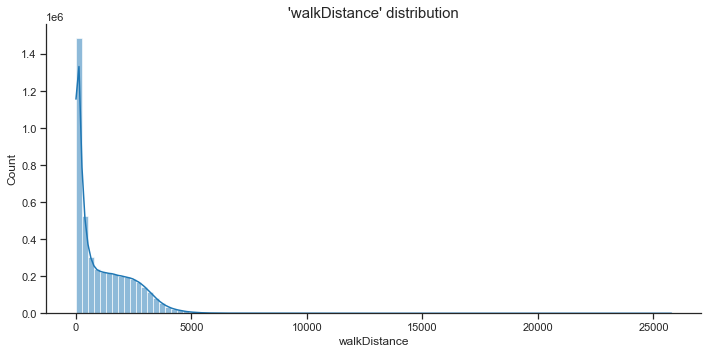

In [ ]:
# walkDistance 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "walkDistance", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'walkDistance' distribution", fontsize = 15)
plt.show()

In [ ]:
# walkDistance 결과 출력
column = "walkDistance"
result_0 = f"> - {column}의 최소/최대는 {walkDistance_describe_1['min']}(0 제외)/{walkDistance_describe_1['max']}입니다."
result_1 = f"> - {column}가 0인 경우의 평균은 {walkDistance_describe_0[0]}이고, 총 {walkDistance_0}/{walkDistance_rate_0}%입니다."
result_2 = f"> - {column}가 1인 경우의 평균은 {walkDistance_describe_1[0]}이고, 총 {walkDistance_1}/{walkDistance_rate_1}%입니다."
print(result_0, result_1, result_2, sep = "\n")

> - walkDistance의 최소/최대는 0.0001(0 제외)/25780.0입니다.
> - walkDistance가 0인 경우의 평균은 1154.2175이고, 총 99603/2.24%입니다.
> - walkDistance가 1인 경우의 평균은 1180.6626이고, 총 4347363/97.76%입니다.


### (27) weaponsAcquired

- Number of weapons picked up.
- 얻은 무기의 수

> - weaponsAcquired의 최소/최대는 1.0(0 제외)/236.0입니다.
> - weaponsAcquired가 0인 경우의 평균은 3.66이고, 총 226578/5.1%입니다.
> - weaponsAcquired가 1인 경우의 평균은 3.86이고, 총 4220388/94.9%입니다.
> - weaponsAcquired 상위 10%의 경우는 총 394/0.01%입니다.

In [ ]:
# 상세 수 확인1(전체)
weaponsAcquired_describe_0 = np.round(train["weaponsAcquired"].describe().drop("count"), 2)
print(weaponsAcquired_describe_0, "\n--------------")

# 상세 수 확인2(0 제외)
weaponsAcquired_describe_1 = np.round(train["weaponsAcquired"][train["weaponsAcquired"] != 0].describe().drop("count"), 2)
print(weaponsAcquired_describe_1)

mean      3.66
std       2.46
min       0.00
25%       2.00
50%       3.00
75%       5.00
max     236.00
Name: weaponsAcquired, dtype: float64 
--------------
mean      3.86
std       2.37
min       1.00
25%       2.00
50%       3.00
75%       5.00
max     236.00
Name: weaponsAcquired, dtype: float64


In [ ]:
# 상세 수 확인3(전체)
train["weaponsAcquired"].value_counts().sort_index()

0      226578
1      580951
2      768836
3      768347
4      689622
        ...  
128         1
153         1
167         1
177         1
236         1
Name: weaponsAcquired, Length: 97, dtype: int64

In [ ]:
# weaponsAcquired 여부에 따른 수와 비율 확인
weaponsAcquired_0 = train["weaponsAcquired"][train["weaponsAcquired"] == 0].count()
weaponsAcquired_rate_0 = np.round(weaponsAcquired_0 / train_size * 100, 2)

# weaponsAcquired 여부에 따른 수와 비율 확인(0 제외)
weaponsAcquired_1 = train["weaponsAcquired"][train["weaponsAcquired"] != 0].count()
weaponsAcquired_rate_1 = np.round(weaponsAcquired_1 / train_size * 100, 2)

# weaponsAcquired 상위 10% 확인(0 제외)
cond_1 = train["weaponsAcquired"][train["weaponsAcquired"] != 0].quantile(0.9)
cond_2 = train["weaponsAcquired"].max()
weaponsAcquired_top = pd.cut(train["assists"], bins = [0, cond_1, cond_2], include_lowest = True).value_counts().values[-1]
weaponsAcquired_top_rate = np.round(weaponsAcquired_top / train_size * 100, 2)

print("weaponsAcquired_0 :", weaponsAcquired_0, "\nweaponsAcquired_rate_0 :", weaponsAcquired_rate_0, "\n--------------")
print("weaponsAcquired_1 :", weaponsAcquired_1, "\nweaponsAcquired_rate_1 :", weaponsAcquired_rate_1, "\n--------------")
print("weaponsAcquired_top :", weaponsAcquired_top, "\nweaponsAcquired_top_rate :", weaponsAcquired_top_rate, "\n--------------")

weaponsAcquired_0 : 226578 
weaponsAcquired_rate_0 : 5.1 
--------------
weaponsAcquired_1 : 4220388 
weaponsAcquired_rate_1 : 94.9 
--------------
weaponsAcquired_top : 394 
weaponsAcquired_top_rate : 0.01 
--------------


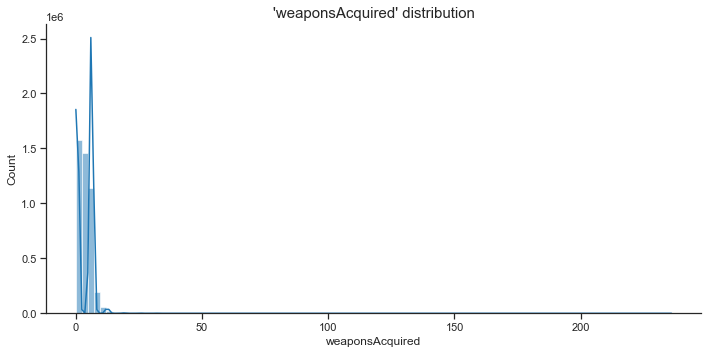

In [ ]:
# weaponsAcquired 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "weaponsAcquired", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'weaponsAcquired' distribution", fontsize = 15)
plt.show()

In [ ]:
# weaponsAcquired 결과 출력
column = "weaponsAcquired"
result_0 = f"> - {column}의 최소/최대는 {weaponsAcquired_describe_1['min']}(0 제외)/{weaponsAcquired_describe_1['max']}입니다."
result_1 = f"> - {column}가 0인 경우의 평균은 {weaponsAcquired_describe_0[0]}이고, 총 {weaponsAcquired_0}/{weaponsAcquired_rate_0}%입니다."
result_2 = f"> - {column}가 1인 경우의 평균은 {weaponsAcquired_describe_1[0]}이고, 총 {weaponsAcquired_1}/{weaponsAcquired_rate_1}%입니다."
result_3 = f"> - {column} 상위 10%의 경우는 총 {weaponsAcquired_top}/{weaponsAcquired_top_rate}%입니다."
print(result_0, result_1, result_2, result_3, sep = "\n")

> - weaponsAcquired의 최소/최대는 1.0(0 제외)/236.0입니다.
> - weaponsAcquired가 0인 경우의 평균은 3.66이고, 총 226578/5.1%입니다.
> - weaponsAcquired가 1인 경우의 평균은 3.86이고, 총 4220388/94.9%입니다.
> - weaponsAcquired 상위 10%의 경우는 총 394/0.01%입니다.


### (28) winPoints

- Win-based external ranking of player.
- 승리를 기반으로 한 Elo 방식의 랭킹

> - winPoints의 최소/최대는 321.0(0 제외)/2013.0입니다.
> - winPoints가 0인 경우의 평균은 606.46이고, 총 2655647/59.72%입니다.
> - winPoints가 1인 경우의 평균은 1505.54이고, 총 1791319/40.28%입니다.
> - winPoints 상위 10%의 경우는 총 175830/3.95%입니다.

In [ ]:
# 상세 수 확인1(전체)
winPoints_describe_0 = np.round(train["winPoints"].describe().drop("count"), 2)
print(winPoints_describe_0, "\n--------------")

# 상세 수 확인2(0 제외)
winPoints_describe_1 = np.round(train["winPoints"][train["winPoints"] != 0].describe().drop("count"), 2)
print(winPoints_describe_1)

mean     606.46
std      739.70
min        0.00
25%        0.00
50%        0.00
75%     1495.00
max     2013.00
Name: winPoints, dtype: float64 
--------------
mean    1505.54
std       68.66
min      321.00
25%     1480.00
50%     1500.00
75%     1530.00
max     2013.00
Name: winPoints, dtype: float64


In [ ]:
# 상세 수 확인3(전체)
train["winPoints"].value_counts().sort_index()

0       2655647
321           2
328          12
329           1
330           3
         ...   
1999          9
2000          2
2001          1
2002          1
2013          1
Name: winPoints, Length: 1447, dtype: int64

In [ ]:
# winPoints 여부에 따른 수와 비율 확인
winPoints_0 = train["winPoints"][train["winPoints"] == 0].count()
winPoints_rate_0 = np.round(winPoints_0 / train_size * 100, 2)

# winPoints 여부에 따른 수와 비율 확인(0 제외)
winPoints_1 = train["winPoints"][train["winPoints"] != 0].count()
winPoints_rate_1 = np.round(winPoints_1 / train_size * 100, 2)

# winPoints 상위 10% 확인(0 제외)
cond_1 = train["winPoints"][train["winPoints"] != 0].quantile(0.9)
cond_2 = train["winPoints"].max()
winPoints_top = pd.cut(train["winPoints"], bins = [0, cond_1, cond_2], include_lowest = True).value_counts().values[-1]
winPoints_top_rate = np.round(winPoints_top / train_size * 100, 2)

print("winPoints_0 :", winPoints_0, "\nwinPoints_rate_0 :", winPoints_rate_0, "\n--------------")
print("winPoints_1 :", winPoints_1, "\nwinPoints_rate_1 :", winPoints_rate_1, "\n--------------")
print("winPoints_top :", winPoints_top, "\nwinPoints_top_rate :", winPoints_top_rate, "\n--------------")

winPoints_0 : 2655647 
winPoints_rate_0 : 59.72 
--------------
winPoints_1 : 1791319 
winPoints_rate_1 : 40.28 
--------------
winPoints_top : 175830 
winPoints_top_rate : 3.95 
--------------


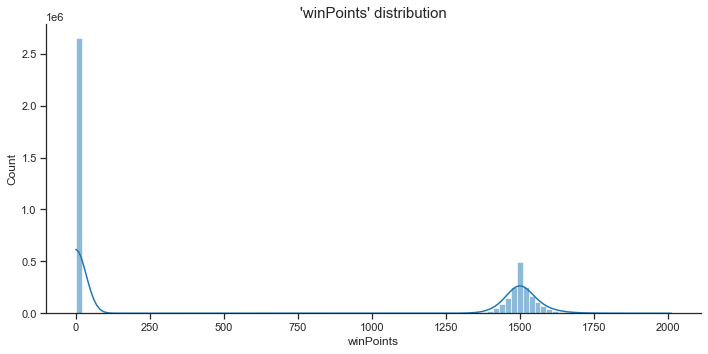

In [ ]:
# winPoints 분포 확인
sns.set_theme(style = "ticks", palette = "tab10")
sns.displot(train, x = "winPoints", height = 5, aspect = 2, kde = True, bins = 100)
plt.title("'winPoints' distribution", fontsize = 15)
plt.show()

In [ ]:
# winPoints 결과 출력
column = "winPoints"
result_0 = f"> - {column}의 최소/최대는 {winPoints_describe_1['min']}(0 제외)/{winPoints_describe_1['max']}입니다."
result_1 = f"> - {column}가 0인 경우의 평균은 {winPoints_describe_0[0]}이고, 총 {winPoints_0}/{winPoints_rate_0}%입니다."
result_2 = f"> - {column}가 1인 경우의 평균은 {winPoints_describe_1[0]}이고, 총 {winPoints_1}/{winPoints_rate_1}%입니다."
result_3 = f"> - {column} 상위 10%의 경우는 총 {winPoints_top}/{winPoints_top_rate}%입니다."
print(result_0, result_1, result_2, result_3, sep = "\n")

> - winPoints의 최소/최대는 321.0(0 제외)/2013.0입니다.
> - winPoints가 0인 경우의 평균은 606.46이고, 총 2655647/59.72%입니다.
> - winPoints가 1인 경우의 평균은 1505.54이고, 총 1791319/40.28%입니다.
> - winPoints 상위 10%의 경우는 총 175830/3.95%입니다.


In [ ]:
# 컬럼별 최소값의 생존율 확인
for i in numerical_columns:
    t = train.loc[train[i] == train[i].min(), "winPlacePerc"].mean()
    if t > 0.5 :
        print(f"'{i}' : {train[i].min()} / {t}")
        

'killPlace' : 1 / 0.9234833717346191


In [ ]:
# 컬럼별 최대값의 생존율 확인
for i in numerical_columns.drop(["killPlace", "maxPlace", "rankPoints"]):
    t = train.loc[train[i] == train[i].max(), "winPlacePerc"].mean()
    if t < 0.5:
        print(f"'{i}' : {train[i].max()} / {t}")

'killPoints' : 2170 / 0.2856999933719635
'matchDuration' : 2237 / 0.4849669933319092


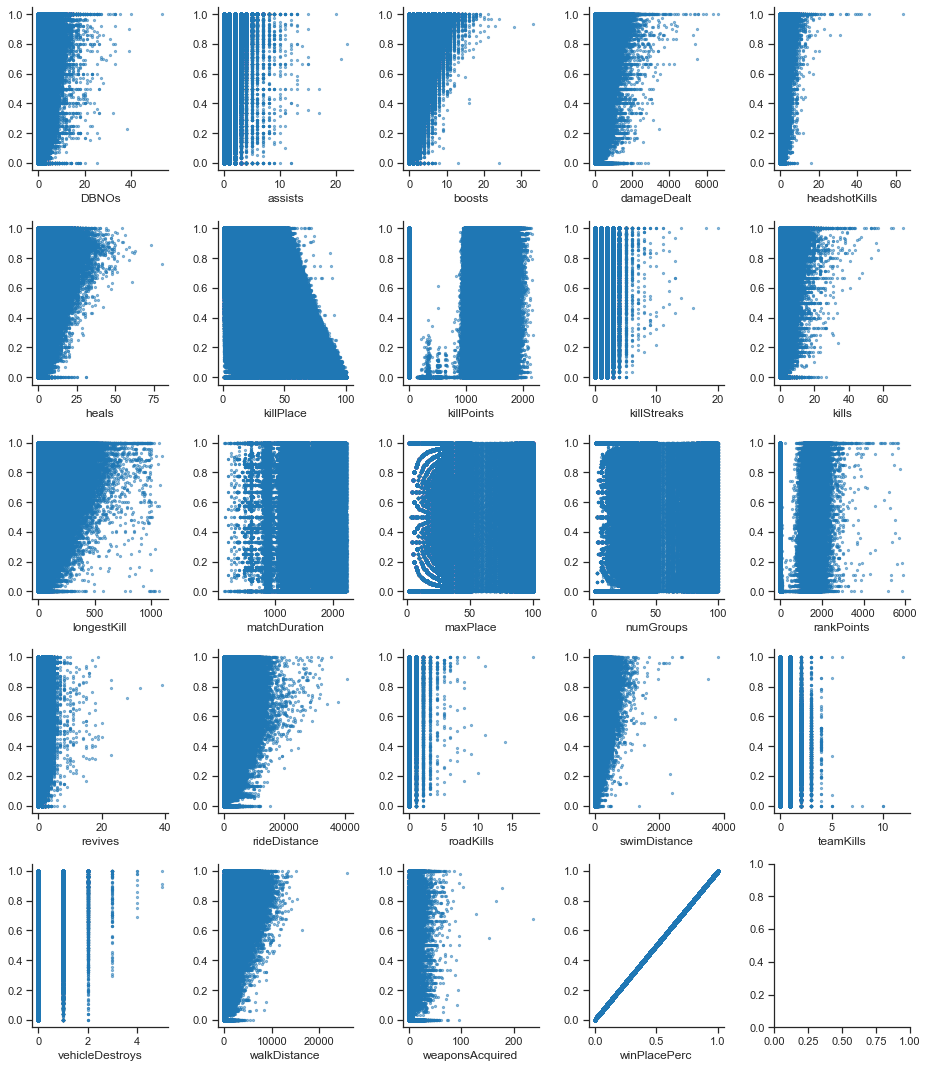

In [ ]:
# numerical 컬럼 & winPlacePerc 시각화 확인
sns.set_theme(style = "ticks", palette = "tab10", rc = {"axes.spines.right": False, "axes.spines.top": False})
numerical_columns_list = train[numerical_columns]

fig, ax = plt.subplots(figsize = (13, 15), ncols = 5, nrows = 5)
axes = ax.ravel()

for i, col in enumerate(numerical_columns_list.columns[:len(numerical_columns_list.columns) - 1]):
    axes[i].scatter(numerical_columns_list[col], numerical_columns_list["winPlacePerc"], s = 5, alpha=0.5)
    axes[i].set_xlabel(col)

plt.tight_layout()

# **3. Hypothesis testing**

## 3-1) 가설 설정 : Winner Winner Chicken Dinner?!

- Winner Winner Chicken Dinner : 도박 배팅 비용과 닭고기 요리 비용이 비슷해 도박에서 우승한 사람이 닭고기를 먹을 수 있었다는 설에서 비롯됐습니다.
- 여포 : 삼국지에서 비롯됐으며, 싸움을 피하지 않고 적극적으로 즐기는 플레이어입니다.
- 존버 : 한 공간에서 계속 버티면서 다가오는 적을 죽이는 전략입니다.
- 파밍 : 적과 싸우기 위해 총, 방어구, 회복 아이템 등의 장비를 얻는 행위를 의미합니다.
- 몽골인 : 적을 잘 찾는 플레이어를 시력이 좋은 몽골인에 빗대어 지칭합니다.
- 고라니킬 : 차량을 피해 뛰어다니는 적인 고라니를 차량으로 치여 죽인 경우입니다.
- 용왕 : 강과 바다에서 버티며 최후의 교전을 준비하는 플레이어입니다.
  
> - (1) 여포 플레이어가 치킨을 먹을 것이다. > damageDealt / kills / killStreaks / killPlace     
> - (2) 아이템을 많이 사용하는 플레이어가 치킨을 먹을 것이다. > boosts / heals  
> - (3-1) 존버하지 않고 열심히 움직인 플레이어가 치킨을 먹을 것이다. > walkDistance / rideDistance  
> - (3-2) 용왕 플레이어가 치킨을 먹을 것이다. > swimDistance  
> - (4) 스킬(파밍/몽골인)이 있는 플레이어가 치킨을 먹을 것이다. > weaponsAcquired / longestKill  
> - (5) 킬러(고라니킬/팀킬) 플레이어가 치킨을 먹을 것이다. > roadKills / teamKills  

## 3-2) 가설 검증 : Correlation analysis & Visualization

## 3-2-1) Correlation analysis

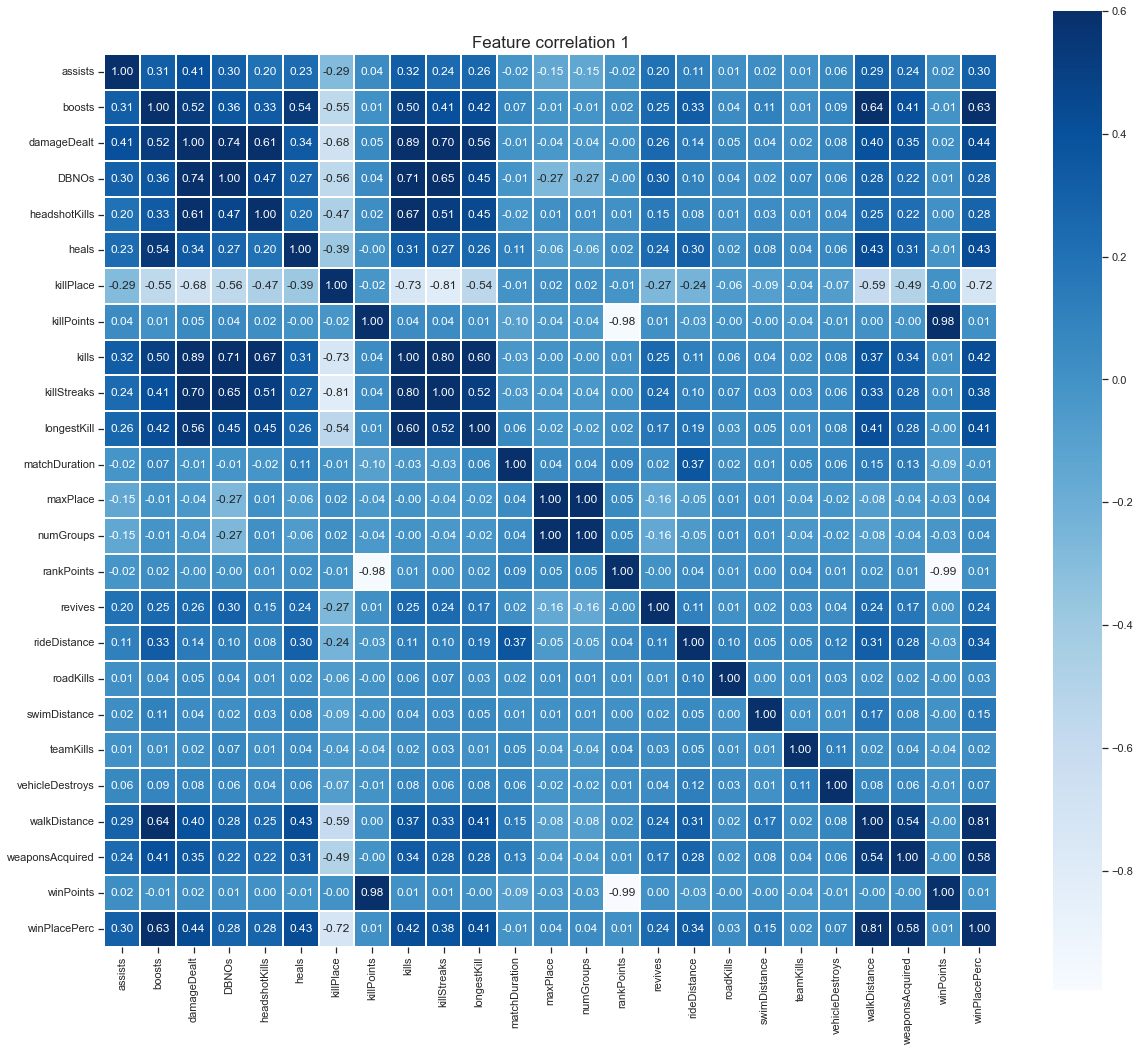

In [ ]:
# 상관관계 시각화 확인
sns.set_theme(style = "ticks", rc = {"figure.figsize":(20, 18)})

sns.heatmap(train.corr(), vmax = 0.6, linewidths = 0.01, square = True, annot = True, fmt = '.2f', cmap = "Blues")
plt.title("Feature correlation 1", fontsize = 17)
plt.show()

In [ ]:
# Correlation analysis 기준, 유의미한 feature 확인
features_corr_all = np.round(train.corr()[-1:].T.sort_values(by = "winPlacePerc", ascending = False)[1:], 2)
features_corr_selected = features_corr_all.query("winPlacePerc > 0.3 or winPlacePerc < -0.3")
features_corr_selected = features_corr_selected.rename_axis("Feature").reset_index()
features_corr_selected.rename(columns = {"winPlacePerc" : "Correlation"}, inplace = True)
features_corr_selected

,Feature,Correlation
0,walkDistance,0.81
1,boosts,0.63
2,weaponsAcquired,0.58
3,damageDealt,0.44
4,heals,0.43
5,kills,0.42
6,longestKill,0.41
7,killStreaks,0.38
8,rideDistance,0.34
9,killPlace,-0.72


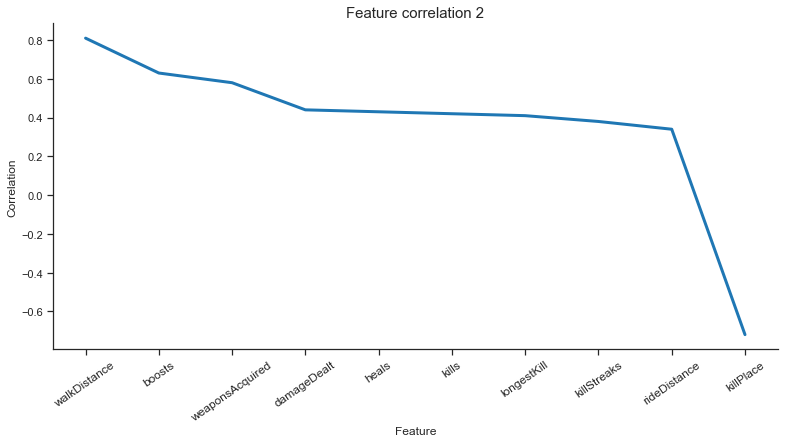

In [ ]:
# 시각화 확인
sns.set_theme(style = "ticks", palette = "tab10", rc = {"axes.spines.right": False, "axes.spines.top": False})
plt.figure(figsize = (13, 6))

sns.lineplot(data = features_corr_selected, x = "Feature", y = "Correlation", linewidth = 3)
plt.xticks(rotation = 35, fontsize = 12)
plt.title("Feature correlation 2", fontsize = 15)
plt.show()

## 3-2-2) Visualization

### (1) 여포 플레이어가 치킨을 먹을 것이다. > damageDealt / kills / killStreaks / killPlace

> - 'damageDealt' : winPlacePerc와 함께 증가하는 양의 상관관계(0.44%)이며, 치킨을 먹을 가능성과 연관된 유의미한 feature입니다.
> - 'kills' : winPlacePerc와 함께 증가하는 양의 상관관계(0.42%)이며, 치킨을 먹을 가능성과 연관된 유의미한 feature입니다.
> - 'killStreaks' : winPlacePerc와 함께 증가하는 양의 상관관계(0.38%)이며, 치킨을 먹을 가능성과 연관된 유의미한 feature입니다.
> - 'killPlace' : winPlacePerc와 반대로 증가하는 음의 상관관계(-0.72%)이며, 치킨을 먹을 가능성과 연관된 유의미한 feature입니다.

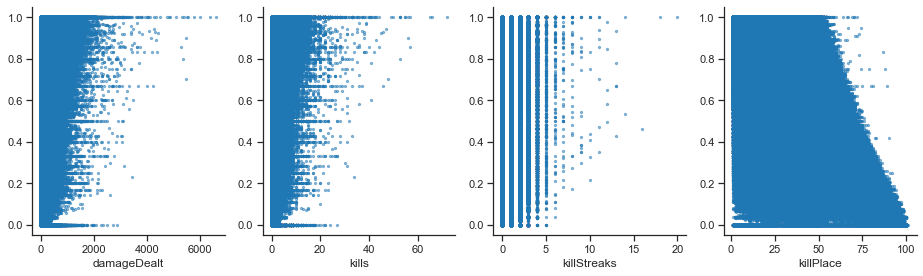

In [ ]:
# winPlacePerc & damageDealt / kills / killStreaks / killPlace 시각화 확인
sns.set_theme(style = "ticks", palette = "tab10", rc = {"axes.spines.right": False, "axes.spines.top": False})
case_1 = train[["damageDealt", "kills", "killStreaks", "killPlace", "winPlacePerc"]]

fig, ax = plt.subplots(figsize = (13, 4), ncols = 4, nrows = 1)
axes = ax.ravel()
for i, col in enumerate(case_1.columns[:len(case_1.columns) - 1]):
    axes[i].scatter(case_1[col], case_1["winPlacePerc"], s = 5, alpha=0.5)
    axes[i].set_xlabel(col)

plt.tight_layout()

### (2) 아이템을 많이 사용하는 플레이어가 치킨을 먹을 것이다. > boosts / heals

> - 'boosts' : winPlacePerc와 함께 증가하는 양의 상관관계(0.63%)이며, 치킨을 먹을 가능성과 연관된 유의미한 feature입니다.
> - 'heals' : winPlacePerc와 함께 증가하는 양의 상관관계(0.43%)이며, 치킨을 먹을 가능성과 연관된 유의미한 feature입니다.

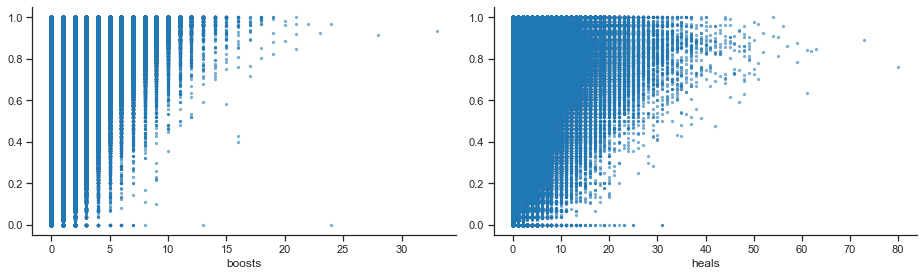

In [ ]:
# winPlacePerc & boosts / heals 시각화 확인
sns.set_theme(style = "ticks", palette = "tab10", rc = {"axes.spines.right": False, "axes.spines.top": False})
case_2 = train[["boosts", "heals", "winPlacePerc"]]

fig, ax = plt.subplots(figsize = (13, 4), ncols = 2, nrows = 1)
axes = ax.ravel()
for i, col in enumerate(case_2.columns[:len(case_2.columns) - 1]):
    axes[i].scatter(case_2[col], case_2["winPlacePerc"], s = 5, alpha=0.5)
    axes[i].set_xlabel(col)

plt.tight_layout()

### (3-1) 존버하지 않고 열심히 움직인 플레이어가 치킨을 먹을 것이다. > walkDistance / rideDistance

> - 'walkDistance' : winPlacePerc와 함께 증가하는 양의 상관관계(0.81%)이며, 치킨을 먹을 가능성과 연관된 유의미한 feature입니다.
> - 'rideDistance' : winPlacePerc와 함께 증가하는 양의 상관관계(0.34%)이며, 치킨을 먹을 가능성과 연관된 유의미한 feature입니다.

### (3-2) 용왕 플레이어가 치킨을 먹을 것이다. > swimDistance

> - 'swimDistance' : winPlacePerc과 0.15%의 상관계수를 가지며, 치킨을 먹을 가능성과 무관한 feature입니다.

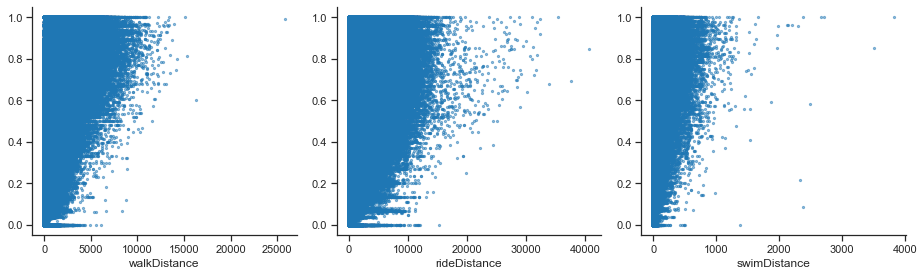

In [ ]:
# winPlacePerc & walkDistance / rideDistance 시각화 확인
sns.set_theme(style = "ticks", palette = "tab10", rc = {"axes.spines.right": False, "axes.spines.top": False})
case_3 = train[["walkDistance", "rideDistance", "swimDistance", "winPlacePerc"]]

fig, ax = plt.subplots(figsize = (13, 4), ncols = 3, nrows = 1)
axes = ax.ravel()
for i, col in enumerate(case_3.columns[:len(case_3.columns) - 1]):
    axes[i].scatter(case_3[col], case_3["winPlacePerc"], s = 5, alpha=0.5)
    axes[i].set_xlabel(col)

plt.tight_layout()

### (4) 스킬(파밍/몽골인)이 있는 플레이어가 치킨을 먹을 것이다. > weaponsAcquired / longestKill

> - 'weaponsAcquired' : winPlacePerc와 함께 증가하는 양의 상관관계(0.58%)이며, 치킨을 먹을 가능성과 연관된 유의미한 feature입니다.
> - 'longestKill' : winPlacePerc와 함께 증가하는 양의 상관관계(0.41%)이며, 치킨을 먹을 가능성과 연관된 유의미한 feature입니다.

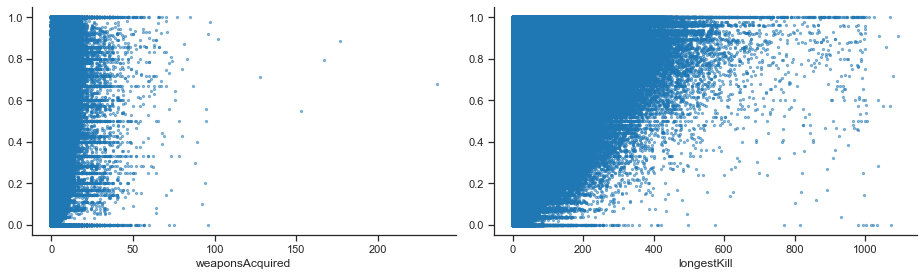

In [ ]:
# winPlacePerc & weaponsAcquired / longestKill 시각화 확인
sns.set_theme(style = "ticks", palette = "tab10", rc = {"axes.spines.right": False, "axes.spines.top": False})
case_4 = train[["weaponsAcquired", "longestKill", "winPlacePerc"]]

fig, ax = plt.subplots(figsize = (13, 4), ncols = 2, nrows = 1)
axes = ax.ravel()
for i, col in enumerate(case_4.columns[:len(case_4.columns) - 1]):
    axes[i].scatter(case_4[col], case_4["winPlacePerc"], s = 5, alpha=0.5)
    axes[i].set_xlabel(col)

plt.tight_layout()

### (5) 킬러(고라니킬/팀킬) 플레이어가 치킨을 먹을 것이다. > roadKills / teamKills

> - 'roadKills' : winPlacePerc과 0.03%의 상관계수를 가지며, 치킨을 먹을 가능성과 무관한 feature입니다.
> - 'teamKills' : winPlacePerc과 0.02%의 상관계수를 가지며, 치킨을 먹을 가능성과 무관한 feature입니다.

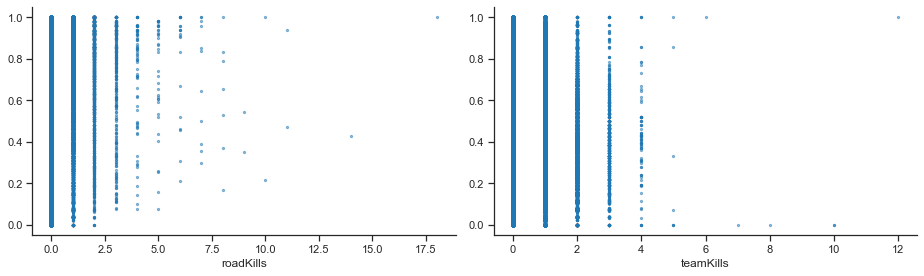

In [ ]:
# winPlacePerc & weaponsAcquired / longestKill 시각화 확인
sns.set_theme(style = "ticks", palette = "tab10", rc = {"axes.spines.right": False, "axes.spines.top": False})
case_5 = train[["roadKills", "teamKills", "winPlacePerc"]]

fig, ax = plt.subplots(figsize = (13, 4), ncols = 2, nrows = 1)
axes = ax.ravel()
for i, col in enumerate(case_5.columns[:len(case_5.columns) - 1]):
    axes[i].scatter(case_5[col], case_5["winPlacePerc"], s = 5, alpha=0.5)
    axes[i].set_xlabel(col)

plt.tight_layout()

## 3-3) 가설 결론

In [ ]:
# 가설 검증에 사용된 feature
cases = case_1 + case_2 + case_3 + case_4 + case_5
cases.columns[:-1]

Index(['boosts', 'damageDealt', 'heals', 'killPlace', 'killStreaks', 'kills',
       'longestKill', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'walkDistance', 'weaponsAcquired'],
      dtype='object')

In [ ]:
# 가설 검증 결론 도출
for i, k in zip(cases.columns[:-1], range(len(cases.columns[:-1]))):
    c = (features_corr_all.T[i][0])
    if c > 0.3:
        print(f"> - '{i}' : winPlacePerc와 함께 증가하는 양의 상관관계({c}%)이며, 치킨을 먹을 가능성과 연관된 유의미한 feature입니다.")
    elif c < -0.3:
        print(f"> - '{i}' : winPlacePerc와 반대로 증가하는 음의 상관관계({c}%)이며, 치킨을 먹을 가능성과 연관된 유의미한 feature입니다.")
    else : 
        print(f"> - '{i}' : winPlacePerc과 {c}%의 상관계수를 가지며, 치킨을 먹을 가능성과 무관한 feature입니다.")

> - 'boosts' : winPlacePerc와 함께 증가하는 양의 상관관계(0.63%)이며, 치킨을 먹을 가능성과 연관된 유의미한 feature입니다.
> - 'damageDealt' : winPlacePerc와 함께 증가하는 양의 상관관계(0.44%)이며, 치킨을 먹을 가능성과 연관된 유의미한 feature입니다.
> - 'heals' : winPlacePerc와 함께 증가하는 양의 상관관계(0.43%)이며, 치킨을 먹을 가능성과 연관된 유의미한 feature입니다.
> - 'killPlace' : winPlacePerc와 반대로 증가하는 음의 상관관계(-0.72%)이며, 치킨을 먹을 가능성과 연관된 유의미한 feature입니다.
> - 'killStreaks' : winPlacePerc와 함께 증가하는 양의 상관관계(0.38%)이며, 치킨을 먹을 가능성과 연관된 유의미한 feature입니다.
> - 'kills' : winPlacePerc와 함께 증가하는 양의 상관관계(0.42%)이며, 치킨을 먹을 가능성과 연관된 유의미한 feature입니다.
> - 'longestKill' : winPlacePerc와 함께 증가하는 양의 상관관계(0.41%)이며, 치킨을 먹을 가능성과 연관된 유의미한 feature입니다.
> - 'rideDistance' : winPlacePerc와 함께 증가하는 양의 상관관계(0.34%)이며, 치킨을 먹을 가능성과 연관된 유의미한 feature입니다.
> - 'roadKills' : winPlacePerc과 0.03%의 상관계수를 가지며, 치킨을 먹을 가능성과 무관한 feature입니다.
> - 'swimDistance' : winPlacePerc과 0.15%의 상관계수를 가지며, 치킨을 먹을 가능성과 무관한 feature입니다.
> - 'teamKills' : winPlacePerc과 0.02%의 상관계수를 가지며, 치킨을 먹을 가능성과 무관한 feature입니다.
> - 'walkDistance' : winPlacePerc와 

In [ ]:
# # 가설 검증에 따른 유의미한 feature 확인
useful_features_1 = [i for i in cases if i not in ["swimDistance", "roadKills", "teamKills", "winPlacePerc"]]
useful_features_list = train[useful_features_1]
useful_features_list.head()

,boosts,damageDealt,heals,killPlace,killStreaks,kills,longestKill,rideDistance,walkDistance,weaponsAcquired
0,0,0.000000,0,60,0,0,0.000000,0.0000,244.800003,1
1,0,91.470001,0,57,0,0,0.000000,0.0045,1434.000000,5
2,0,68.000000,0,47,0,0,0.000000,0.0000,161.800003,2
3,0,32.900002,0,75,0,0,0.000000,0.0000,202.699997,3
4,0,100.000000,0,45,1,1,58.529999,0.0000,49.750000,2


# **4. Feature engineering**

## 4-1) Data cleaning

### (1) 결측치 제거  / Target(y) 분리

In [ ]:
# target 내 결측치 확인
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [ ]:
# target 내 결측치 재 확인2
train[train["winPlacePerc"].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [ ]:
# 결측치 제거 및 결측치 여부 재 확인
train = train.drop(index = 2744604, axis = 0)
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [ ]:
# target 분리
y_target = train["winPlacePerc"]
y_target

0          0.4444
1          0.6400
2          0.7755
3          0.1667
4          0.1875
            ...  
4446961    0.1786
4446962    0.2935
4446963    0.4815
4446964    0.8000
4446965    0.5464
Name: winPlacePerc, Length: 4446965, dtype: float32

### (2) 데이터 결합

In [ ]:
# Feature engineering을 위한 train & test 결합
df = pd.concat((train, test))
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000000,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.800003,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470001,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.000000,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000000,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.800003,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900002,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.699997,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.750000,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,a316c3a13887d5,80e82180c90951,f276da5fd73536,1,2,381.000000,3,0,7,4,...,1,0.0000,0,0.000,0,0,1799.000000,5,1526,NaN
1934170,5312146b27d875,147264a127c56e,fb77cbfe094a6b,0,0,0.000000,0,0,0,64,...,0,0.0000,0,0.000,0,0,1195.000000,3,1496,NaN
1934171,fc8818b5b32ad3,7bbb4779ebedd5,efb74d5f6e9779,0,0,91.959999,0,0,3,24,...,0,0.0000,0,7.798,1,0,3327.000000,3,0,NaN
1934172,a0f91e35f8458f,149a506a64c2b1,3a2cf335bc302f,1,2,138.600006,0,0,12,25,...,1,0.0000,0,0.000,0,0,1893.000000,4,0,NaN


In [ ]:
# train & train + test shape 확인
train.shape, df.shape

((4446965, 29), (6381139, 29))

### (3) Feature 제거

In [ ]:
# 무의미한 feature 제거
df.drop(["Id", "groupId", "matchId", "winPlacePerc"], axis = 1, inplace = True)
df.shape

(6381139, 25)

### (4) Feature 변환

In [ ]:
# dtype 확인 > object 타입 변환 필요 확인
df.dtypes

assists               int8
boosts                int8
damageDealt        float32
DBNOs                 int8
headshotKills         int8
heals                 int8
killPlace             int8
killPoints           int16
kills                 int8
killStreaks           int8
longestKill        float32
matchDuration        int16
matchType           object
maxPlace              int8
numGroups             int8
rankPoints           int16
revives               int8
rideDistance       float32
roadKills             int8
swimDistance       float32
teamKills             int8
vehicleDestroys       int8
walkDistance       float32
weaponsAcquired      int16
winPoints            int16
dtype: object

In [ ]:
# matchType 변환
for i, k in zip(matchType_list, range(len(matchType_list))):
    df.loc[df["matchType"].str.contains(i), "matchType"] = i
    df["matchType"] = df["matchType"]
df["matchType"]

0          squad
1          squad
2            duo
3          squad
4           solo
           ...  
1934169    squad
1934170    squad
1934171    squad
1934172      duo
1934173    squad
Name: matchType, Length: 6381139, dtype: object

In [ ]:
# matchType 변환에 따른 value 종류 확인
df["matchType"].value_counts()

squad    3432716
duo      1900256
solo     1034636
crash       9537
flare       3994
Name: matchType, dtype: int64

In [ ]:
# matchType 원핫 인코딩 적용
df = pd.get_dummies(df, columns = ["matchType"])
df.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,matchType_crash,matchType_duo,matchType_flare,matchType_solo,matchType_squad
0,0,0,0.000000,0,0,0,60,1241,0,0,...,0,0,244.800003,1,1466,0,0,0,0,1
1,0,0,91.470001,0,0,0,57,0,0,0,...,0,0,1434.000000,5,0,0,0,0,0,1
2,1,0,68.000000,0,0,0,47,0,0,0,...,0,0,161.800003,2,0,0,1,0,0,0
3,0,0,32.900002,0,0,0,75,0,0,0,...,0,0,202.699997,3,0,0,0,0,0,1
4,0,0,100.000000,0,0,0,45,0,1,1,...,0,0,49.750000,2,0,0,0,0,1,0


In [ ]:
# train & train dtype 최종 확인
df.columns[df.dtypes == "object"]

Index([], dtype='object')

### (5) train / test 분리

In [ ]:
# train & train 분리
train_all, test_all = df[:train_size - 1], df[train_size - 1:]
train_all.shape, test_all.shape

((4446965, 29), (1934174, 29))

In [ ]:
train_all.tail()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,matchType_crash,matchType_duo,matchType_flare,matchType_solo,matchType_squad
4446961,0,0,0.000000,0,0,0,74,1029,0,0,...,0,0,1019.000000,3,1507,0,0,0,0,1
4446962,0,1,44.150002,0,0,0,69,0,0,0,...,0,0,81.699997,6,0,0,0,0,1,0
4446963,0,0,59.060001,0,0,0,66,0,0,0,...,0,0,788.700012,4,0,0,0,0,0,1
4446964,0,4,180.399994,1,1,2,11,0,2,1,...,0,0,2748.000000,8,0,0,0,0,0,1
4446965,0,2,268.000000,0,0,1,18,0,2,1,...,0,0,1244.000000,5,0,0,0,0,1,0


In [ ]:
test_all.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,matchType_crash,matchType_duo,matchType_flare,matchType_solo,matchType_squad
0,0,0,51.459999,0,0,0,73,0,0,0,...,0,0,588.000000,1,0,0,0,0,0,1
1,0,4,179.100006,0,0,2,11,0,2,1,...,0,0,2017.000000,6,0,0,1,0,0,0
2,1,0,23.400000,0,0,4,49,0,0,0,...,0,0,787.799988,4,0,0,0,0,0,1
3,0,0,65.519997,0,0,0,54,0,0,0,...,0,0,1812.000000,3,0,0,1,0,0,0
4,0,4,330.200012,1,2,1,7,0,3,1,...,0,0,2963.000000,4,0,0,0,0,0,1


## 4-2) Feature selection

In [ ]:
# 가설 검증을 기반으로 선별한 유의미한 feature list 생성
feature_selected_1 = train_all[useful_features_1]
feature_selected_1

,boosts,damageDealt,heals,killPlace,killStreaks,kills,longestKill,rideDistance,walkDistance,weaponsAcquired
0,0,0.000000,0,60,0,0,0.000000,0.0000,244.800003,1
1,0,91.470001,0,57,0,0,0.000000,0.0045,1434.000000,5
2,0,68.000000,0,47,0,0,0.000000,0.0000,161.800003,2
3,0,32.900002,0,75,0,0,0.000000,0.0000,202.699997,3
4,0,100.000000,0,45,1,1,58.529999,0.0000,49.750000,2
...,...,...,...,...,...,...,...,...,...,...
4446961,0,0.000000,0,74,0,0,0.000000,1292.0000,1019.000000,3
4446962,1,44.150002,0,69,0,0,0.000000,0.0000,81.699997,6
4446963,0,59.060001,0,66,0,0,0.000000,0.0000,788.700012,4
4446964,4,180.399994,2,11,1,2,98.500000,0.0000,2748.000000,8


In [ ]:
# 다중공선성 확인 / VIF가 10을 넘지 않으므로 feature의 선별 타당성 확인
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

feature_selected_vif = pd.DataFrame({
    "Feature" : feature_selected_1.columns,
    "VIF" : [variance_inflation_factor(feature_selected_1.values, idx)
            for idx in range(feature_selected_1.shape[1])]})

feature_selected_vif = np.round(feature_selected_vif.sort_values(by = "VIF", ascending = False).reset_index(drop = True), 2)
feature_selected_vif

,Feature,VIF
0,kills,9.64
1,damageDealt,7.89
2,weaponsAcquired,4.33
3,killStreaks,4.21
4,walkDistance,4.09
5,boosts,3.23
6,longestKill,2.05
7,heals,1.86
8,killPlace,1.77
9,rideDistance,1.40


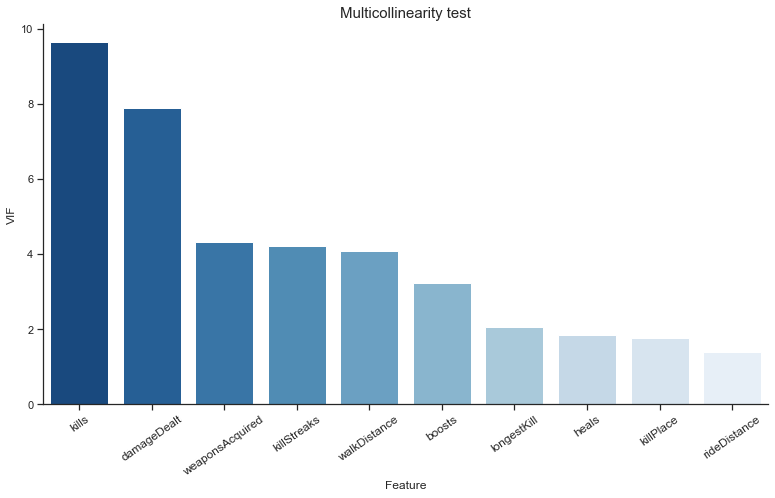

In [ ]:
# VIF 시각화 확인
sns.set_theme(style = "ticks", rc = {"axes.spines.right": False, "axes.spines.top": False})
plt.figure(figsize = (13, 7))
palette = sns.color_palette("Blues", n_colors = 10)
palette.reverse()

sns.barplot(data = feature_selected_vif, x = "Feature", y = "VIF", palette = palette)
plt.xticks(rotation = 35, fontsize = 12)
plt.title("Multicollinearity test", fontsize = 15)
plt.show()

# **5. Modeling / Evaluation**

## 5-1) Baseline model

#### 본 과정에서 Baseline 모델을 설정하여 이후 테스트 시 타 모델과 성능을 비교합니다.

- MAE 기준, LinearRegression(0.09010615) / RandomForestRegressor(0.05834871)를 Baseline 모델로 설정합니다. 
- 평가 지표의 경우, kaggle에서 제시한 MAE(Mean Absolute Error) 지표와 동일하게 선택했습니다.

> - LinearRegression / MAE : 0.09010615 ✔︎
> - Ridge / MAE : 0.09010833
> - Lasso / MAE : 0.12086049
> - ElasticNet / MAE : 0.11302574
> - RandomForestRegressor / MAE : 0.05834871 ✔︎

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
# train & target 사이즈 확인
train_all.shape, len(y_target)

((4446965, 29), 4446965)

In [ ]:
# train & valid 8:2 split 진행
x_train, x_valid, y_train, y_valid = train_test_split(train_all, y_target, test_size = 0.2, random_state = 42)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((3557572, 29), (889393, 29), (3557572,), (889393,))

In [ ]:
# Modeling & Prediction 진행
lr_model = LinearRegression().fit(x_train, y_train)
lr_pred = lr_model.predict(x_valid)

rd_model = Ridge().fit(x_train, y_train)
rd_pred = rd_model.predict(x_valid)

ls_model = Lasso().fit(x_train, y_train)
ls_pred = ls_model.predict(x_valid)

en_model = ElasticNet().fit(x_train, y_train)
en_pred = en_model.predict(x_valid)

rf_model = RandomForestRegressor(n_jobs = -1, random_state = 42).fit(x_train, y_train)
rf_pred = rf_model.predict(x_valid)

In [ ]:
# Evaluation 진행
print("> - LinearRegression / MAE :", mean_absolute_error(y_valid, lr_pred))
print("> - Ridge / MAE :", mean_absolute_error(y_valid, rd_pred))
print("> - Lasso / MAE :", mean_absolute_error(y_valid, ls_pred))
print("> - ElasticNet / MAE :", mean_absolute_error(y_valid, en_pred))
print("> - RandomForestRegressor / MAE :", np.round(mean_absolute_error(y_valid, rf_pred), 8))

> - LinearRegression / MAE : 0.09010615
> - Ridge / MAE : 0.09010833
> - Lasso / MAE : 0.12086049
> - ElasticNet / MAE : 0.11302574
> - RandomForestRegressor / MAE : 0.05834871


## 5-2) Scaling

#### 본 과정은 Scaling 전후의 성능 차이와, 어떤 Scaler가 가장 적합한지 확인합니다.
 
- Tree 기반 모델은 Scaling 영향을 안받는지, 상당한 이상치를 포함한 데이터에 어떤 Scaler가 적합한지를 중점적으로 살펴봅니다.  

> - 본 데이터 기준, 두 Scaler 중 이상치에 영향을 덜 받아 상대적으로 성능 개선에 영향을 끼친 Scaler는 RobustScaler입니다.
> - 하지만 개선 효과가 매우 미미하며, 본 테스트의 Baseline 모델에 영향을 끼치는 것으로 판단하기 어렵습니다.

### (1) StandardScaler

> - LinearRegression + StandardScaler / MAE : 0.09010817
> - RandomForestRegressor + StandardScaler / MAE : 0.0583511

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_ss = StandardScaler().fit(x_train)
x_train_ss = scaler_ss.transform(x_train)
x_valid_ss = scaler_ss.transform(x_valid)

In [ ]:
lr_model_ss = LinearRegression().fit(x_train_ss, y_train)
lr_pred_ss = lr_model_ss.predict(x_valid_ss)

rf_model_ss = RandomForestRegressor(n_jobs = -1, random_state = 42).fit(x_train_ss, y_train)
rf_pred_ss = rf_model_ss.predict(x_valid_ss)

In [ ]:
print("> - LinearRegression + StandardScaler / MAE :", mean_absolute_error(y_valid, lr_pred_ss))
print("> - RandomForestRegressor + StandardScaler / MAE :", np.round(mean_absolute_error(y_valid, rf_pred_ss), 8))

### (2) RobustScaler

> - LinearRegression + RobustScaler / MAE : 0.09009432
> - RandomForestRegressor + RobustScaler / MAE : 0.05834943 ✔︎

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler_rs = RobustScaler().fit(x_train)
x_train_rs = scaler_rs.transform(x_train)
x_valid_rs = scaler_rs.transform(x_valid)

In [ ]:
lr_model_rs = LinearRegression().fit(x_train_rs, y_train)
lr_pred_rs = lr_model_rs.predict(x_valid_rs)

rf_model_rs = RandomForestRegressor(n_jobs = -1, random_state = 42).fit(x_train_rs, y_train)
rf_pred_rs = rf_model_rs.predict(x_valid_rs)

In [ ]:
print("> - LinearRegression + RobustScaler / MAE :", mean_absolute_error(y_valid, lr_pred_rs))
print("> - RandomForestRegressor + RobustScaler / MAE :", np.round(mean_absolute_error(y_valid, rf_pred_rs), 8))

> - LinearRegression + RobustScaler / MAE : 0.09009432
> - RandomForestRegressor + RobustScaler / MAE : 0.05834943


## 5-3) Closs validation

#### 본 과정은 Closs validation의 목적과 과정을 이해하고, Baseline model과 XGBRegressor 모델의 성능을 비교합니다.

> - XGBRegressor + Cross Validation / MAE(mean) : -0.05845009
> - XGBRegressor / MAE : 0.05840602

In [ ]:
# train_test_split 적용
x_train, x_valid, y_train, y_valid = train_test_split(train_all, y_target, test_size = 0.2, random_state = 42)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((3557572, 29), (889393, 29), (3557572,), (889393,))

In [ ]:
# XGBRegressor 모델 생성
import xgboost as xgb
from xgboost import XGBRegressor

xgb_model = XGBRegressor(eval_metric = "logloss", n_jobs = -1, random_state = 42).fit(x_train, y_train)
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
score = cross_val_score(xgb_model, train_all, y_target, cv = kfold, scoring = "neg_mean_absolute_error", n_jobs = -1)
xgb_score = np.round(np.mean(score), 8)

In [ ]:
xgb_pred = xgb_model.predict(x_valid)
print("> - XGBRegressor + Cross Validation / MAE(mean) :", xgb_score)
print("> - XGBRegressor / MAE :", np.round(mean_absolute_error(y_valid, xgb_pred), 8))

> - XGBRegressor + Cross Validation / MAE(mean) : -0.05845009
> - XGBRegressor / MAE : 0.05840602


## 5-4) Feature importance

#### 본 과정은 트리 기반 모델 학습 시, 분기에 영향을 미치는 중요한 feature를 살펴봅니다.

- 상기 테스트에서 생성한 총 3가지의 트리기반 모델의 상위 10개의 Feature importance를 시각화합니다.

> - 동일한 RandomForestRegressor 모델이더라도, Scaling 여부에 따라 Feature importance의 정도가 변하는 점을 확인했습니다.
> - 동일한 트리 기반 모델이더라도, 모델에 따라 Feature importance 종류와 정도가 다르다는 점을 확인했습니다.

### (1) RandomForestRegressor

In [ ]:
# 상위 10개 feature importance 확인
rf_feature_importance_1 = pd.DataFrame({"Feature" : x_train.columns, "Importance" : rf_model.feature_importances_}).sort_values("Importance", ascending = False)
rf_feature_importance_1 = rf_feature_importance_1.iloc[:10, :]

In [ ]:
rf_feature_importance_1

,Feature,Importance
21,walkDistance,0.697864
6,killPlace,0.181984
11,matchDuration,0.018127
13,numGroups,0.017783
12,maxPlace,0.012905
16,rideDistance,0.007547
2,damageDealt,0.007411
8,kills,0.007044
10,longestKill,0.005858
14,rankPoints,0.005835


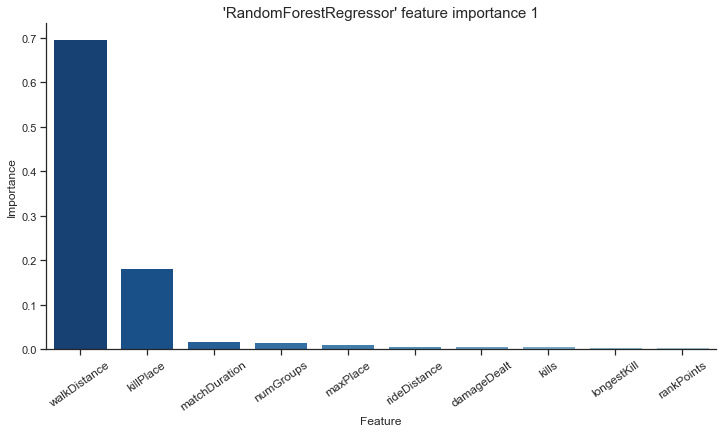

In [ ]:
# feature importance 시각화 확인
sns.set_theme(style = "ticks", rc = {"axes.spines.right": False, "axes.spines.top": False})
plt.figure(figsize = (12, 6))
palette = sns.color_palette("Blues", n_colors = 15)
palette.reverse()

sns.barplot(data = rf_feature_importance_1, x = "Feature", y = "Importance", palette = palette)
plt.title("'RandomForestRegressor' feature importance 1", fontsize = 15)
plt.xticks(rotation = 35, fontsize = 12)
plt.show()

### (2) RandomForestRegressor + RobustScaler

In [ ]:
# 상위 10개 feature importance 확인
rf_feature_importance_2 = pd.DataFrame({"Feature" : x_train.columns, "Importance" : rf_model_rs.feature_importances_}).sort_values("Importance", ascending = False)
rf_feature_importance_2 = rf_feature_importance_2.iloc[:10, :]
rf_feature_importance_2

,Feature,Importance
21,walkDistance,0.697863
6,killPlace,0.181984
11,matchDuration,0.018128
13,numGroups,0.017781
12,maxPlace,0.012908
16,rideDistance,0.007546
2,damageDealt,0.007409
8,kills,0.007013
10,longestKill,0.005857
14,rankPoints,0.005835


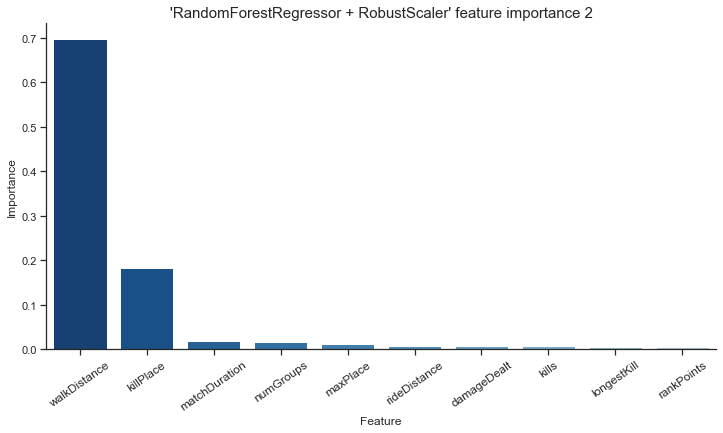

In [ ]:
# feature importance 시각화 확인
sns.set_theme(style = "ticks", rc = {"axes.spines.right": False, "axes.spines.top": False})
plt.figure(figsize = (12, 6))
palette = sns.color_palette("Blues", n_colors = 15)
palette.reverse()

sns.barplot(data = rf_feature_importance_2, x = "Feature", y = "Importance", palette = palette)
plt.title("'RandomForestRegressor + RobustScaler' feature importance 2", fontsize = 15)
plt.xticks(rotation = 35, fontsize = 12)
plt.show()

### (3)  XGBRegressor

In [ ]:
# 상위 10개 feature importance 확인
xgb_feature_importance = pd.DataFrame({"Feature" : x_train.columns, "Importance" : xgb_model.feature_importances_}).sort_values("Importance", ascending = False)
xgb_feature_importance = xgb_feature_importance.iloc[:10, :]
xgb_feature_importance

,Feature,Importance
21,walkDistance,0.610006
6,killPlace,0.123973
8,kills,0.043447
1,boosts,0.032860
3,DBNOs,0.030325
27,matchType_solo,0.020028
13,numGroups,0.019664
12,maxPlace,0.018800
11,matchDuration,0.013879
28,matchType_squad,0.013130


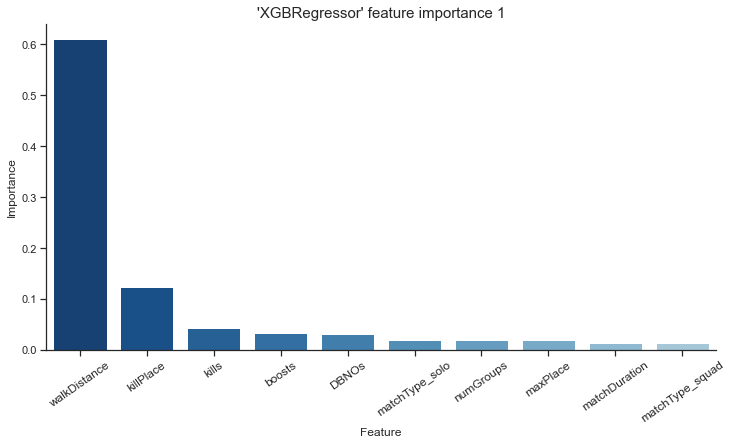

In [ ]:
# feature importance 시각화 확인
sns.set_theme(style = "ticks", rc = {"axes.spines.right": False, "axes.spines.top": False})
plt.figure(figsize = (12, 6))
palette = sns.color_palette("Blues", n_colors = 15)
palette.reverse()

sns.barplot(data = xgb_feature_importance, x = "Feature", y = "Importance", palette = palette)
plt.title("'XGBRegressor' feature importance 1", fontsize = 15)
plt.xticks(rotation = 35, fontsize = 12)
plt.show()

## 5-5) Feature selection

#### 본 과정은 전체 데이터가 아닌, Feature selection을 통한 유의미한 feature 조합으로 모델의 성능을 개선시킬 수 있는지 살펴봅니다.

- target과 상관관계가 높았던 feature와, 트리 기반 모델의 feature importance 상위 10개의 feature를 조합하여 모델링합니다.
- CPU 문제로 인해, PolynomialFeatures / GridSearchCV 통한 Hyperparameter tuning / LightGBM 모델 사용 등 다양한 테스트가 진행이 어려웠습니다.

> - LinearRegression / MAE : 0.09010615
> - Ridge / MAE : 0.09010833
> - Lasso / MAE : 0.12086049
> - ElasticNet / MAE : 0.11302574
> - RandomForestRegressor / MAE : 0.05834871
> - XGBRegressor / MAE : 0.05840602

> **Best Score**
> 1. LinearRegression(Feature selection) / MAE : 0.09074379
> 2. RandomForestRegressor(Train_all) / MAE : 0.05834871
> 3. XGBRegressor(Train_all) / MAE : 0.05840602

In [ ]:
# feature importance 3개 모델의 feature + 상관관계에 따른 유의미한 feature 조합
for i in ["Feature"]:
    fi_1 = rf_feature_importance_1[i].values
    fi_2 = rf_feature_importance_2[i].values
    fi_3 = xgb_feature_importance[i].values
    fs_4 = feature_selected_1.columns
    fss = np.concatenate((fi_1, fi_2, fi_3, fs_4))
    useful_features_2 = list(set(fss))

In [ ]:
# 중복 제거한 feature 리스트 확인
useful_features_2

['boosts',
 'killStreaks',
 'heals',
 'kills',
 'matchType_solo',
 'matchType_squad',
 'maxPlace',
 'matchDuration',
 'rideDistance',
 'DBNOs',
 'longestKill',
 'numGroups',
 'damageDealt',
 'rankPoints',
 'weaponsAcquired',
 'walkDistance',
 'killPlace']

In [ ]:
# 최종 feature selection 적용한 목록 생성
features_selected_2 = train_all[useful_features_2]
features_selected_2.shape

(4446965, 17)

In [ ]:
# train(feature selection) & target 사이즈 확인
features_selected_2.shape, len(y_target)

((4446965, 17), 4446965)

In [ ]:
# train_test_split 적용
x_train, x_valid, y_train, y_valid = train_test_split(features_selected_2, y_target, test_size = 0.2, random_state = 42)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((3557572, 17), (889393, 17), (3557572,), (889393,))

In [ ]:
# 전체 데이터를 사용한 테스트(5-1~4)와 동일한 모델 사용
lr_model_fs = LinearRegression().fit(x_train, y_train)
lr_pred_fs = lr_model_fs.predict(x_valid)

rd_mode_fs = Ridge().fit(x_train, y_train)
rd_pred_fs = rd_mode_fs.predict(x_valid)

ls_model_fs = Lasso().fit(x_train, y_train)
ls_pred_fs = ls_model_fs.predict(x_valid)

en_model_fs = ElasticNet().fit(x_train, y_train)
en_pred_fs = en_model_fs.predict(x_valid)

rf_model_fs = RandomForestRegressor(n_jobs = -1, random_state = 42).fit(x_train, y_train)
rf_pred_fs = rf_model_fs.predict(x_valid)

xgb_model_fs = XGBRegressor(eval_metric = "logloss", n_jobs = -1, random_state = 42).fit(x_train, y_train)
xgb_pred_fs = xgb_model_fs.predict(x_valid)

In [ ]:
# 최종 모델 성능 확인
print("> - LinearRegression / MAE :", mean_absolute_error(y_valid, lr_pred_fs))
print("> - Ridge / MAE :", mean_absolute_error(y_valid, rd_pred_fs))
print("> - Lasso / MAE :", mean_absolute_error(y_valid, ls_pred_fs))
print("> - ElasticNet / MAE :", mean_absolute_error(y_valid, en_pred_fs))
print("> - RandomForestRegressor / MAE :", np.round(mean_absolute_error(y_valid, rf_pred_fs), 8))
print("> - XGBRegressor / MAE :", np.round(mean_absolute_error(y_valid, xgb_pred_fs), 8))

> - LinearRegression / MAE : 0.09074379
> - Ridge / MAE : 0.090744056
> - Lasso / MAE : 0.12086101
> - ElasticNet / MAE : 0.11314134
> - RandomForestRegressor / MAE : 0.05874792
> - XGBRegressor / MAE : 0.05857424
